# BULLKpy  
@mmm, December 21, 2025



# 1. Imports and settings

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import anndata as ad
import bullkpy as bk
bk.settings.verbosity = 3

In [2]:
bk.settings.plot_theme = "paper"      # "default" | "paper" | "talk"
bk.settings.plot_palette = "Set1"
bk.settings.plot_fontsize = 12        # optional
bk.settings.plot_dpi = 100
bk.settings.save_dpi = 300

# every plot calls set_style() internally, or you can call once:
bk.pl.set_style()

In [3]:
PATH = "/Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/ASB02_CDKpredict/data/"

### Open last .h5ad if already generated

In [4]:
adata = ad.read_h5ad("251221_CDKpredict_BULLKpy_RNAseq.h5ad")

In [5]:
#Force a specific palette for one metadata column
bk.settings.set_palette_for("Subtype_PAM50", where="obs", palette="Set2")
bk.settings.reset_colors()

# 2. Import data into AnnData and BULLKpy object

In [4]:
adata = bk.read_counts(
    PATH + "270624_CDKpredict_counts.tsv",
    sep="\t",
    orientation="genes_by_samples",
)

adata

INFO: Reading count matrix from /Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/ASB02_CDKpredict/data/270624_CDKpredict_counts.tsv
INFO: Raw matrix shape: (59428, 94)
INFO: Interpreting rows as genes and columns as samples
INFO: Created AnnData object with 94 samples ? 59428 genes


AnnData object with n_obs × n_vars = 94 × 59428

In [5]:
adata = bk.add_metadata(
    adata,
    PATH + "all_clinical_data_250624.tsv",
    sep="\t",
    index_col="Code",
)

adata

INFO: Adding metadata from /Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/ASB02_CDKpredict/data/all_clinical_data_250624.tsv
INFO: Found metadata for 91 / 94 samples


AnnData object with n_obs × n_vars = 94 × 59428
    obs: 'ID_Def', 'Patient', 'Sequencing', 'Point', 'Batch', 'Cohort', 'Hospital', 'Born_date', 'Age', 'Sex', 'Race', 'Menopause', 'Oof', 'LH-RH', 'Neutrophils(xM)', 'Platelets(x100k)', 'Haemoglobin', 'Creatine', 'BT', 'AST', 'ALT', 'ECOG', 'Metastasis_initial', 'Date_Primary', 'Date_metastasis', 'Neoadjuvant_therapy', 'Tipo_QT', 'HT', 'Tipo_HT', 'Fin_TH', 'Location_metastasis', 'Num_org', 'Bone_ony', 'Hepatica', 'Visceral', 'Biopsy_date', 'CDK_date', 'Tissue', 'Biopsy', 'L_Tipoh', 'L_Grado', 'L_RE', 'L_RP', 'L_HER2_IHC', 'HER2_low', 'L_Ki67', 'C_Typeh', 'C_Grade', 'C_Ki67', 'C_TILs', 'CellsT%', 'Area%', 'CELTIL', 'Subtype', 'Subtype2', 'Subtype3', 'CDK_Inicial', 'CDK_final', 'CDK_P_AR', 'CDK_PA_R', 'Hormone_therapy', 'Analogues', 'Start_date', 'End_date', 'HormonoS', 'HormonoR', 'HormonoS2', 'Codigo', 'Enf_med', 'Mejor_R', 'ORR', 'CBR', 'E_PFS', 'F_PFS', 'FC_PFS', 'E_OS', 'F_OS', 'FC_OS', 'LFUP', 't_PFS', 'PFS_mes', 't_OS', 'OS_mes', 'B

In [6]:
bk.pp.set_raw_counts(adata)      # layers["counts"]

INFO: Stored raw counts in adata.layers['counts'].


In [7]:
bk.pp.qc_metrics(adata)

INFO: Computing bulk RNA-seq QC metrics
INFO: QC metrics added to adata.obs and adata.var


In [63]:
adata.obs.head()

,ID_Def,Patient,Sequencing,Point,Batch,Cohort,Hospital,Born_date,Age,Sex,...,PAM50MET,MET,LumA,Basal,CES,CESPG,total_counts,n_genes_detected,pct_counts_mt,pct_counts_ribo
1015-002,29.0,1015-002,Yes,Basal,Batch3,CDKpredict,2.0,28/12/32,87.0,1.0,...,low,0.0,0.318415,-0.572437,0.890852,3.0,3124731,21481,4.994990,3.983767
1015-005,32.0,1015-005,Yes,Basal,Batch3,CDKpredict,2.0,15/4/48,72.0,1.0,...,high,1.0,0.774022,-0.317263,1.091285,3.0,3409821,22696,3.345542,4.938382
1015-007,36.0,1015-007,Yes,Basal,Batch3,CDKpredict,2.0,22/12/42,77.0,1.0,...,low,0.0,0.119712,-0.255510,0.375222,2.0,3611201,21733,3.588751,3.874030
1015-017,97.0,1015-017,Yes,Basal,Batch5,CDKpredict,2.0,25/3/75,46.0,1.0,...,high,1.0,0.609028,-0.501561,1.110588,3.0,2878473,22374,3.327702,3.104459
1015-019,101.0,1015-019,Yes,Basal,Batch4,CDKpredict,2.0,1/10/55,65.0,1.0,...,low,0.0,0.488211,-0.549772,1.037983,3.0,1455901,19054,1.922109,3.375298


In [64]:
adata

AnnData object with n_obs × n_vars = 94 × 59428
    obs: 'ID_Def', 'Patient', 'Sequencing', 'Point', 'Batch', 'Cohort', 'Hospital', 'Born_date', 'Age', 'Sex', 'Race', 'Menopause', 'Oof', 'LH-RH', 'Neutrophils(xM)', 'Platelets(x100k)', 'Haemoglobin', 'Creatine', 'BT', 'AST', 'ALT', 'ECOG', 'Metastasis_initial', 'Date_Primary', 'Date_metastasis', 'Neoadjuvant_therapy', 'Tipo_QT', 'HT', 'Tipo_HT', 'Fin_TH', 'Location_metastasis', 'Num_org', 'Bone_ony', 'Hepatica', 'Visceral', 'Biopsy_date', 'CDK_date', 'Tissue', 'Biopsy', 'L_Tipoh', 'L_Grado', 'L_RE', 'L_RP', 'L_HER2_IHC', 'HER2_low', 'L_Ki67', 'C_Typeh', 'C_Grade', 'C_Ki67', 'C_TILs', 'CellsT%', 'Area%', 'CELTIL', 'Subtype', 'Subtype2', 'Subtype3', 'CDK_Inicial', 'CDK_final', 'CDK_P_AR', 'CDK_PA_R', 'Hormone_therapy', 'Analogues', 'Start_date', 'End_date', 'HormonoS', 'HormonoR', 'HormonoS2', 'Codigo', 'Enf_med', 'Mejor_R', 'ORR', 'CBR', 'E_PFS', 'F_PFS', 'FC_PFS', 'E_OS', 'F_OS', 'FC_OS', 'LFUP', 't_PFS', 'PFS_mes', 't_OS', 'OS_mes', 'B

# 3. Quality Control and preprocessing

Typical recommended workflow (bulk RNA-seq)  

## 3.1. Compute QC

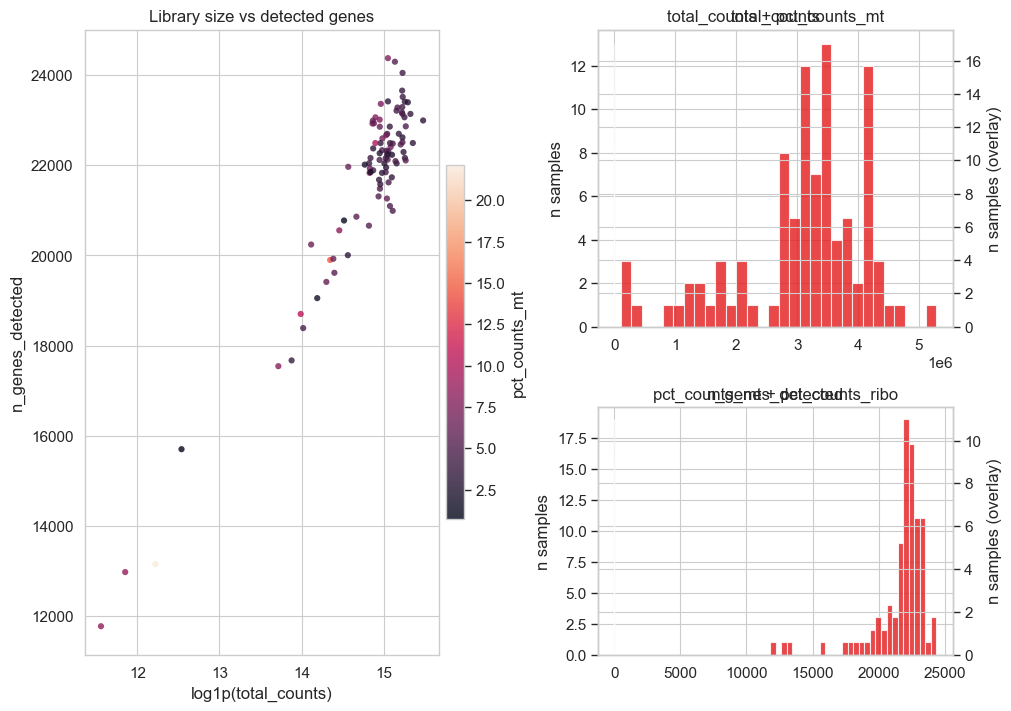

(<Figure size 1000x700 with 6 Axes>,
 array([<Axes: title={'center': 'Library size vs detected genes'}, xlabel='log1p(total_counts)', ylabel='n_genes_detected'>,
        <Axes: title={'center': 'total_counts'}, ylabel='n samples'>,
        <Axes: title={'center': 'n_genes_detected'}, ylabel='n samples'>],
       dtype=object))

In [8]:
bk.pl.qc_metrics(adata, color="pct_counts_mt", save=PATH + "qc_panel.png")

## 3.2. Visual QC overview

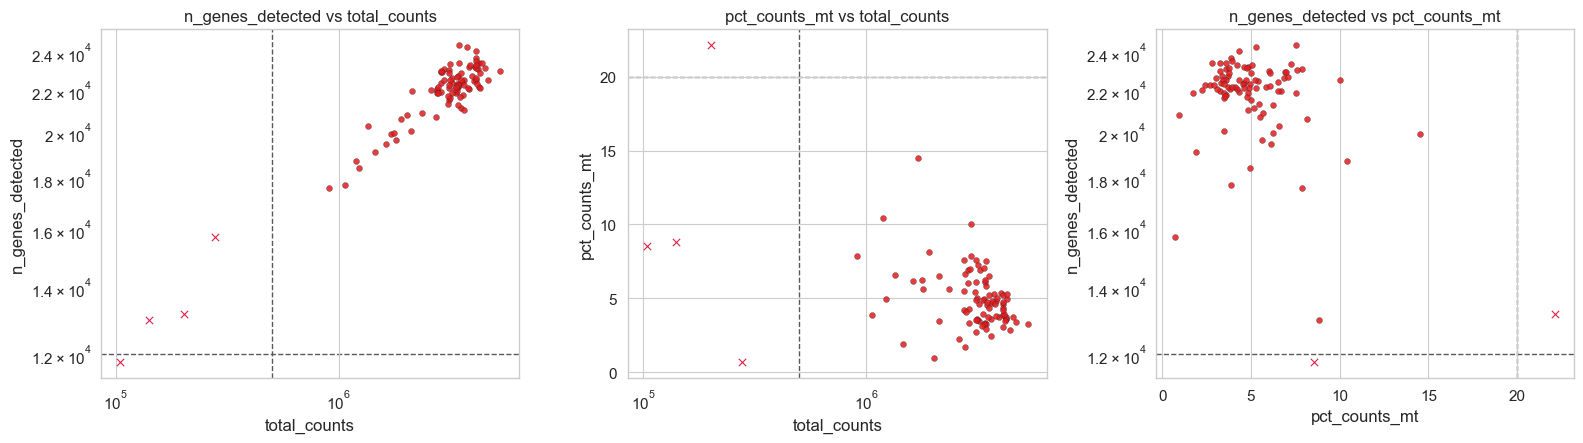

(<Figure size 1600x460 with 3 Axes>,
 array([<Axes: title={'center': 'n_genes_detected vs total_counts'}, xlabel='total_counts', ylabel='n_genes_detected'>,
        <Axes: title={'center': 'pct_counts_mt vs total_counts'}, xlabel='total_counts', ylabel='pct_counts_mt'>,
        <Axes: title={'center': 'n_genes_detected vs pct_counts_mt'}, xlabel='pct_counts_mt', ylabel='n_genes_detected'>],
       dtype=object))

In [20]:
bk.pl.qc_scatter_panel(
    adata,
    min_counts=5e5,
    min_genes=12000,
    max_mt=20,
)

## 3.3. Decide thresholds

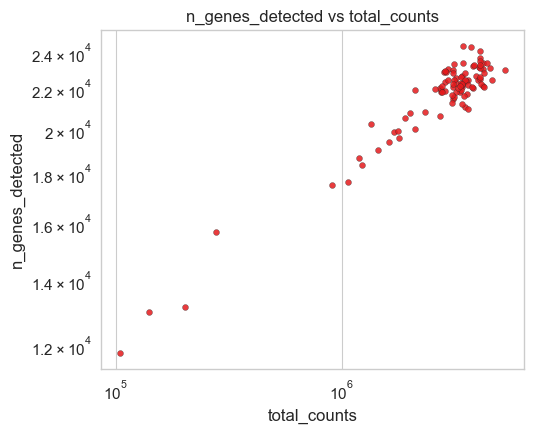

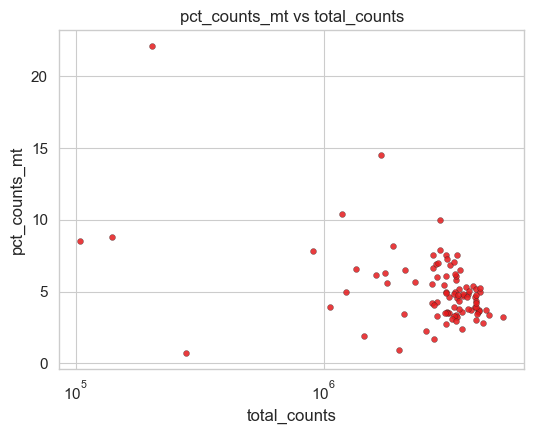

(<Figure size 550x450 with 1 Axes>,
 <Axes: title={'center': 'pct_counts_mt vs total_counts'}, xlabel='total_counts', ylabel='pct_counts_mt'>)

In [21]:
bk.pl.library_size_vs_genes(adata, logx=True, logy=True)
bk.pl.mt_fraction_vs_counts(adata)

## 3.4. Filter samples

In [ ]:
adata = adata[
    (adata.obs.total_counts > 5e5) &
    (adata.obs.n_genes_detected > 12000) &
    (adata.obs.pct_counts_mt < 20)
].copy()

In [ ]:
OLD---_CHECKKKK

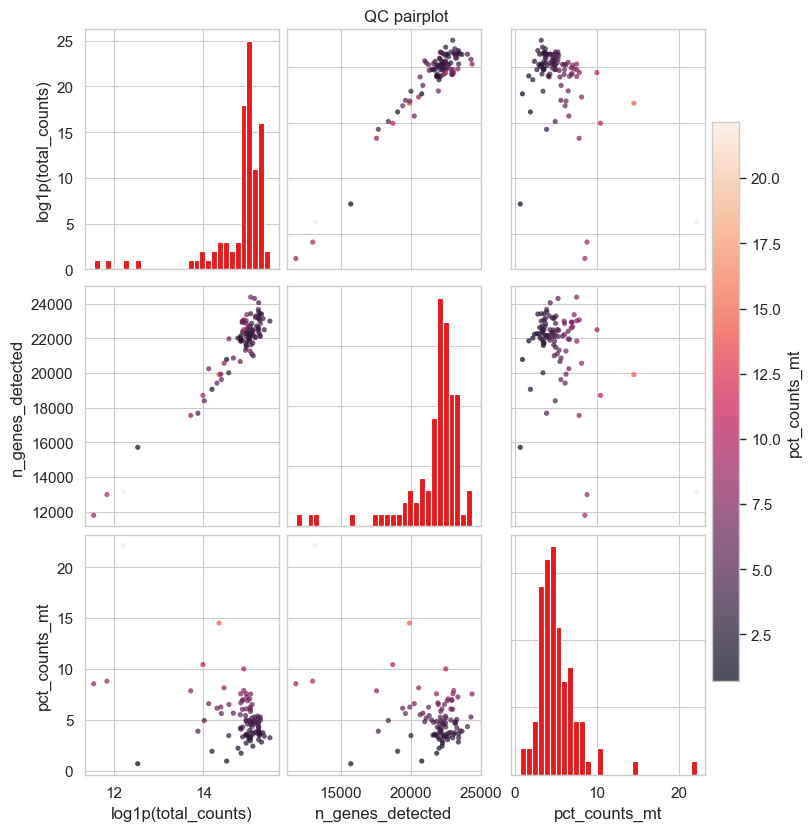

(<Figure size 800x800 with 10 Axes>,
 array([[<Axes: ylabel='log1p(total_counts)'>, <Axes: >, <Axes: >],
        [<Axes: ylabel='n_genes_detected'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='log1p(total_counts)', ylabel='pct_counts_mt'>,
         <Axes: xlabel='n_genes_detected'>,
         <Axes: xlabel='pct_counts_mt'>]], dtype=object))

In [9]:
# (A) Scanpy-like multi-panel QC view
bk.pl.qc_pairplot(adata, save="qc_pairplot.png")

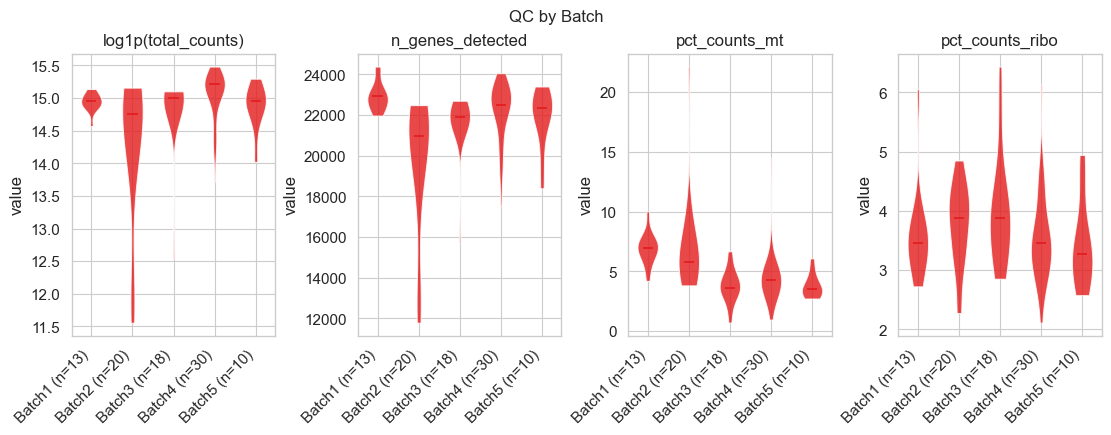

(<Figure size 1100x400 with 4 Axes>,
 array([<Axes: title={'center': 'log1p(total_counts)'}, ylabel='value'>,
        <Axes: title={'center': 'n_genes_detected'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_mt'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_ribo'}, ylabel='value'>],
       dtype=object))

In [10]:
# (B) Grouped QC (replace 'Batch' with your actual column name)
bk.pl.qc_by_group(adata, groupby="Batch", kind="violin", save="qc_by_batch.png")

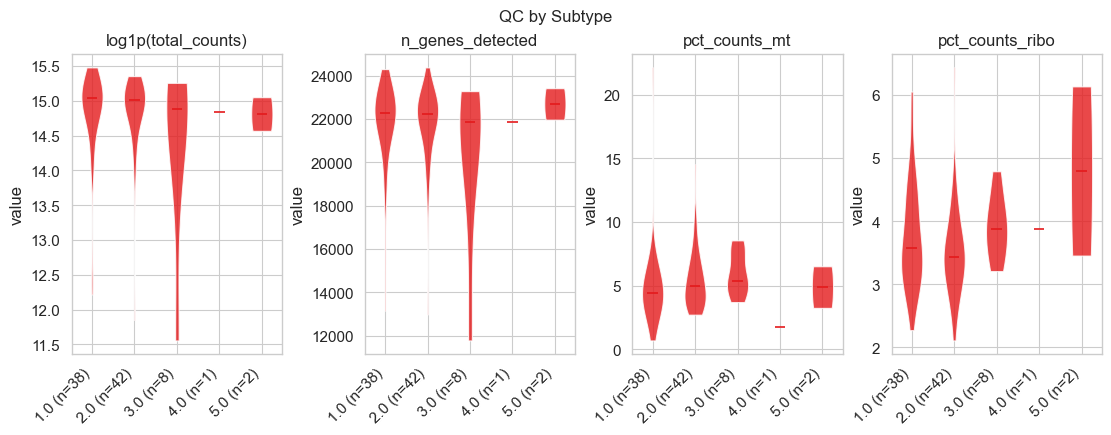

(<Figure size 1100x400 with 4 Axes>,
 array([<Axes: title={'center': 'log1p(total_counts)'}, ylabel='value'>,
        <Axes: title={'center': 'n_genes_detected'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_mt'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_ribo'}, ylabel='value'>],
       dtype=object))

In [11]:
bk.pl.qc_by_group(
    adata,
    groupby="Subtype",
    kind="violin",
    save="qc_by_subtype.png",
)

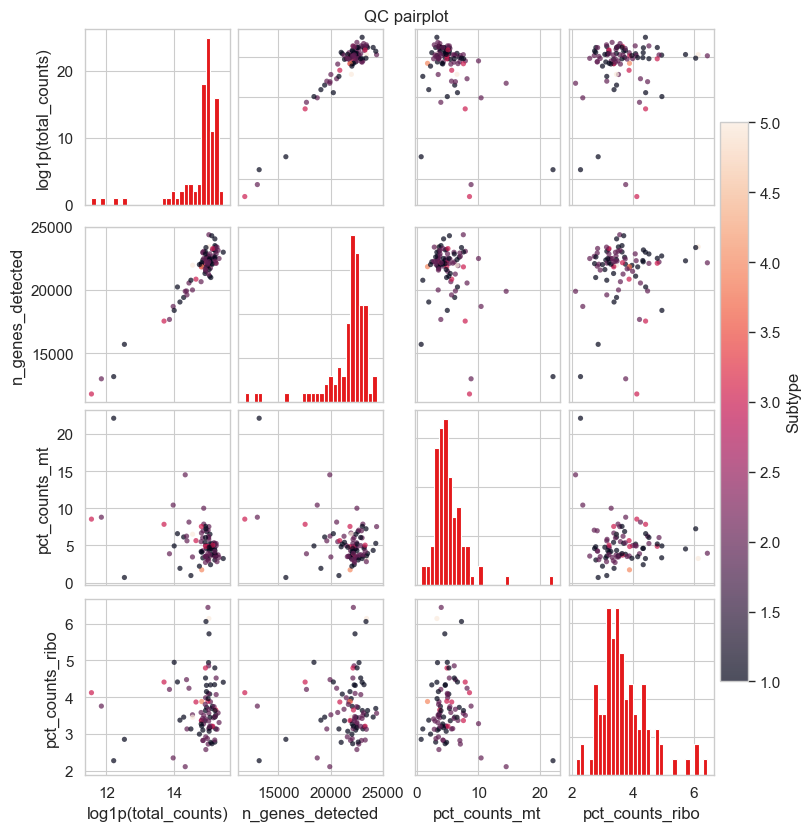

(<Figure size 800x800 with 17 Axes>,
 array([[<Axes: ylabel='log1p(total_counts)'>, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='n_genes_detected'>, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='pct_counts_mt'>, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='log1p(total_counts)', ylabel='pct_counts_ribo'>,
         <Axes: xlabel='n_genes_detected'>,
         <Axes: xlabel='pct_counts_mt'>, <Axes: xlabel='pct_counts_ribo'>]],
       dtype=object))

In [12]:
bk.pl.qc_pairplot(
    adata,
    keys=("total_counts", "n_genes_detected", "pct_counts_mt", "pct_counts_ribo"),
    color="Subtype",          # categorical coloring works fine
    log1p=("total_counts",),  # typical for bulk
    save="qc_pairplot_subtype.png",
)

Two practical improvements (highly recommended)

1) Make Subtype ordering stable + put “Unknown/NA” last

Before plotting:

In [13]:
adata.obs["Subtype"] = adata.obs["Subtype"].astype("category")
# Optional: set a preferred order if you have one
# adata.obs["Subtype"] = adata.obs["Subtype"].cat.reorder_categories([...], ordered=True)

# Put NaNs into an explicit category (optional)
adata.obs["Subtype"] = adata.obs["Subtype"].cat.add_categories(["Unknown"]).fillna("Unknown")

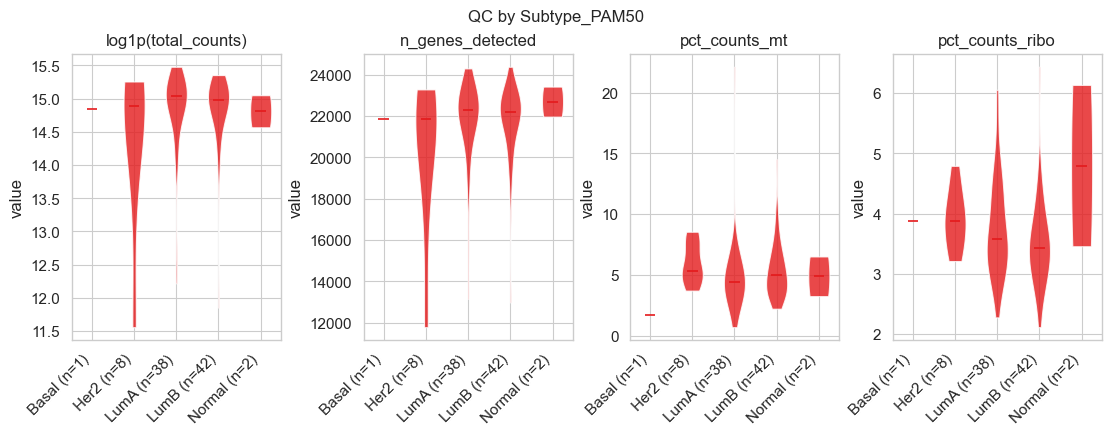

(<Figure size 1100x400 with 4 Axes>,
 array([<Axes: title={'center': 'log1p(total_counts)'}, ylabel='value'>,
        <Axes: title={'center': 'n_genes_detected'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_mt'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_ribo'}, ylabel='value'>],
       dtype=object))

In [16]:
# If you have lots of subtypes, it helps to restrict to the most frequent:
top = adata.obs["Subtype_PAM50"].value_counts().head(8).index
adata_sub = adata[adata.obs["Subtype_PAM50"].isin(top)].copy()

bk.pl.qc_by_group(adata_sub, groupby="Subtype_PAM50", kind="violin", save="qc_by_subtype_top8.png")

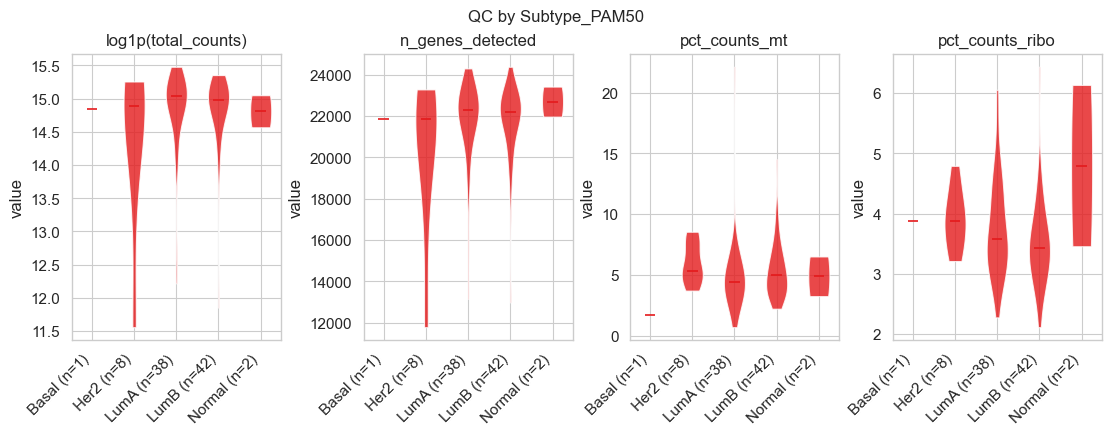

(<Figure size 1100x400 with 4 Axes>,
 array([<Axes: title={'center': 'log1p(total_counts)'}, ylabel='value'>,
        <Axes: title={'center': 'n_genes_detected'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_mt'}, ylabel='value'>,
        <Axes: title={'center': 'pct_counts_ribo'}, ylabel='value'>],
       dtype=object))

In [17]:
# by Subtype
bk.pl.qc_by_group(
    adata,
    groupby="Subtype_PAM50",
    kind="violin",
    show_n=True,
    save="qc_by_subtype.png",
)

### 3.1. Overview QC panel (recommended first plot)

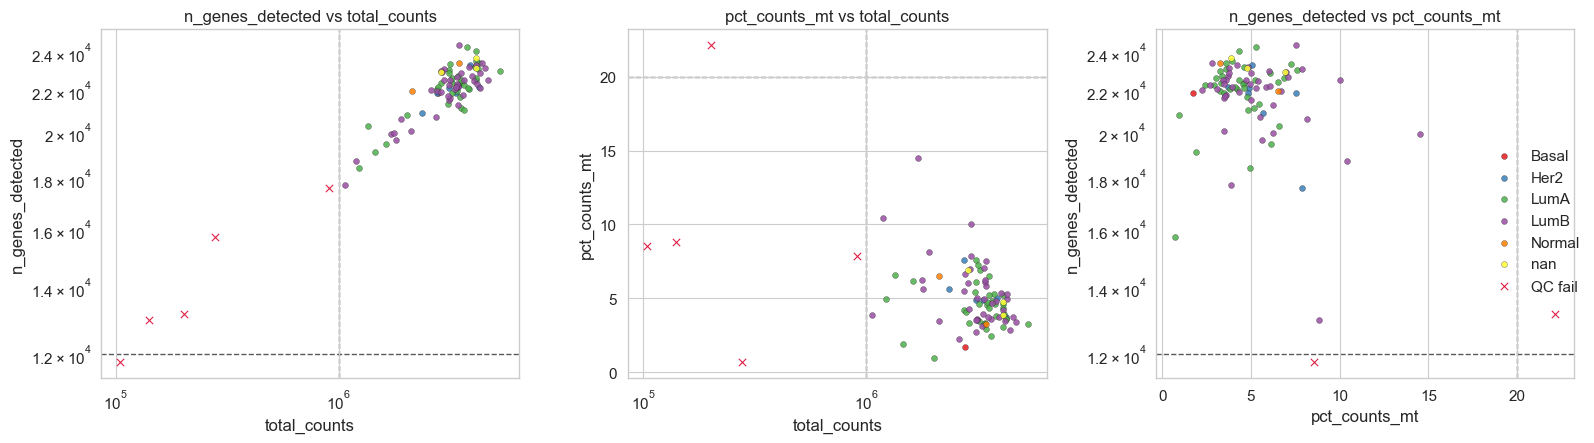

(<Figure size 1600x460 with 3 Axes>,
 array([<Axes: title={'center': 'n_genes_detected vs total_counts'}, xlabel='total_counts', ylabel='n_genes_detected'>,
        <Axes: title={'center': 'pct_counts_mt vs total_counts'}, xlabel='total_counts', ylabel='pct_counts_mt'>,
        <Axes: title={'center': 'n_genes_detected vs pct_counts_mt'}, xlabel='pct_counts_mt', ylabel='n_genes_detected'>],
       dtype=object))

In [18]:
bk.pl.qc_scatter_panel(
    adata,
    groupby="Subtype_PAM50",
    min_counts=1e6,
    min_genes=12000,
    max_mt=20,
    save="figs/qc_panel.png",
)

In [ ]:
# 3.2. Library size vs detected genes (single plot)

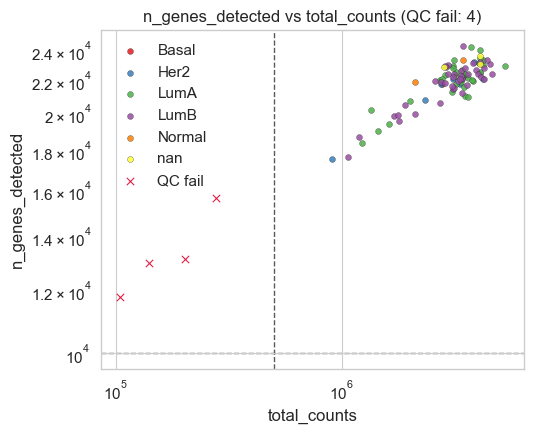

(<Figure size 550x450 with 1 Axes>,
 <Axes: title={'center': 'n_genes_detected vs total_counts (QC fail: 4)'}, xlabel='total_counts', ylabel='n_genes_detected'>)

In [19]:
bk.pl.library_size_vs_genes(
    adata,
    groupby="Subtype_PAM50",
    min_counts=5e5,
    min_genes=10000,
    logx=True,
    logy=True,
    save="figs/qc_counts_vs_genes.png",
)

### Filter out

In [18]:
adata.obs[["total_counts","n_genes_detected","pct_counts_mt"]].describe()

,total_counts,n_genes_detected,pct_counts_mt
count,9.400000e+01,94.000000,94.000000
mean,3.079190e+06,21636.680851,5.175278
std,1.057602e+06,2204.292553,2.733112
min,1.045150e+05,11778.000000,0.692743
25%,2.767975e+06,21505.750000,3.583692
50%,3.324527e+06,22193.000000,4.766103
75%,3.769885e+06,22857.250000,6.128385
max,5.286625e+06,24376.000000,22.135340


In [19]:
# 3) Filter genes first (removes noise / speeds up)
bk.pp.filter_genes(adata, min_samples=5, layer="counts")         #min_samples=3–10 is typical depending on cohort size and heterogeneity

INFO: filter_genes: keeping 31807/59428 genes (min_samples=5, min_counts>0)


AnnData object with n_obs × n_vars = 94 × 31807
    obs: 'ID_Def', 'Patient', 'Sequencing', 'Point', 'Batch', 'Cohort', 'Hospital', 'Born_date', 'Age', 'Sex', 'Race', 'Menopause', 'Oof', 'LH-RH', 'Neutrophils(xM)', 'Platelets(x100k)', 'Haemoglobin', 'Creatine', 'BT', 'AST', 'ALT', 'ECOG', 'Metastasis_initial', 'Date_Primary', 'Date_metastasis', 'Neoadjuvant_therapy', 'Tipo_QT', 'HT', 'Tipo_HT', 'Fin_TH', 'Location_metastasis', 'Num_org', 'Bone_ony', 'Hepatica', 'Visceral', 'Biopsy_date', 'CDK_date', 'Tissue', 'Biopsy', 'L_Tipoh', 'L_Grado', 'L_RE', 'L_RP', 'L_HER2_IHC', 'HER2_low', 'L_Ki67', 'C_Typeh', 'C_Grade', 'C_Ki67', 'C_TILs', 'CellsT%', 'Area%', 'CELTIL', 'Subtype', 'Subtype2', 'Subtype3', 'CDK_Inicial', 'CDK_final', 'CDK_P_AR', 'CDK_PA_R', 'Hormone_therapy', 'Analogues', 'Start_date', 'End_date', 'HormonoS', 'HormonoR', 'HormonoS2', 'Codigo', 'Enf_med', 'Mejor_R', 'ORR', 'CBR', 'E_PFS', 'F_PFS', 'FC_PFS', 'E_OS', 'F_OS', 'FC_OS', 'LFUP', 't_PFS', 'PFS_mes', 't_OS', 'OS_mes', 'B

In [20]:
# 4) Recompute QC after gene filtering (optional but nice)
bk.pp.qc_metrics(adata)

INFO: Computing bulk RNA-seq QC metrics
INFO: QC metrics added to adata.obs and adata.var


In [21]:
# 5) Filter samples (based on your QC judgement)
bk.pp.filter_samples(
    adata,
    min_genes=8000,
    min_counts=1e6,
    max_pct_mt=20,
)

INFO: filter_samples: keeping 89/94 samples (min_genes=8000, min_counts=1000000.0, max_pct_mt=20, max_pct_ribo=None)


AnnData object with n_obs × n_vars = 89 × 31807
    obs: 'ID_Def', 'Patient', 'Sequencing', 'Point', 'Batch', 'Cohort', 'Hospital', 'Born_date', 'Age', 'Sex', 'Race', 'Menopause', 'Oof', 'LH-RH', 'Neutrophils(xM)', 'Platelets(x100k)', 'Haemoglobin', 'Creatine', 'BT', 'AST', 'ALT', 'ECOG', 'Metastasis_initial', 'Date_Primary', 'Date_metastasis', 'Neoadjuvant_therapy', 'Tipo_QT', 'HT', 'Tipo_HT', 'Fin_TH', 'Location_metastasis', 'Num_org', 'Bone_ony', 'Hepatica', 'Visceral', 'Biopsy_date', 'CDK_date', 'Tissue', 'Biopsy', 'L_Tipoh', 'L_Grado', 'L_RE', 'L_RP', 'L_HER2_IHC', 'HER2_low', 'L_Ki67', 'C_Typeh', 'C_Grade', 'C_Ki67', 'C_TILs', 'CellsT%', 'Area%', 'CELTIL', 'Subtype', 'Subtype2', 'Subtype3', 'CDK_Inicial', 'CDK_final', 'CDK_P_AR', 'CDK_PA_R', 'Hormone_therapy', 'Analogues', 'Start_date', 'End_date', 'HormonoS', 'HormonoR', 'HormonoS2', 'Codigo', 'Enf_med', 'Mejor_R', 'ORR', 'CBR', 'E_PFS', 'F_PFS', 'FC_PFS', 'E_OS', 'F_OS', 'FC_OS', 'LFUP', 't_PFS', 'PFS_mes', 't_OS', 'OS_mes', 'B

### Normalize

	•	layers["counts"] = raw integer counts
	•	layers["cpm"] = normalized
	•	layers["log1p_cpm"] = for PCA/plotting

In [22]:
bk.pp.normalize_cpm(adata)                  # layers["cpm"]

INFO: Wrote CPM-normalized data to adata.layers['cpm'].


In [23]:
bk.pp.log1p(adata)                          # layers["log1p_cpm"]

INFO: Wrote log1p-transformed data to adata.layers['log1p_cpm'].


In [24]:
# quick check
adata.layers["log1p_cpm"]

array([[0.        , 0.27765936, 0.95558156, ..., 3.81032314, 3.64920955,
        4.10308593],
       [0.        , 0.        , 1.11613387, ..., 4.49832837, 3.8130144 ,
        4.83814291],
       [0.        , 0.60473775, 0.24445407, ..., 4.10784609, 3.49183791,
        4.35295756],
       ...,
       [0.        , 0.76761653, 0.76761653, ..., 4.30056373, 4.38076772,
        4.48584002],
       [0.        , 0.        , 0.96225967, ..., 3.66805082, 3.51677399,
        4.61159401],
       [0.        , 0.91097637, 1.49718298, ..., 4.83931325, 3.9894912 ,
        4.43974759]])

# 4. Highly-variable genes, PCA and bidimensional representation

In [25]:
# to confirm categories
adata.obs["Subtype"] = adata.obs["Subtype"].astype("category")

In [26]:
bk.pp.highly_variable_genes(adata, layer="log1p_cpm", n_top_genes=2000)
adata.var["highly_variable"].sum()

INFO: Computing HVGs from layer='log1p_cpm' with n_top_genes=2000
INFO: Marked 2000 highly variable genes in adata.var['highly_variable']


2000

If you ever see HVGs dominated by:
	•	mitochondrial genes
	•	ribosomal genes

you may want to exclude them before HVG selection:

- `mask = ~adata.var_names.str.startswith(("MT-", "RPS", "RPL"))`  
- `adata_hvg = adata[:, mask].copy()`  
- `bk.pp.highly_variable_genes(adata_hvg, ...)`
  


INFO: Running PCA on matrix 89 samples × 31807 genes; n_comps=20
INFO: PCA stored in adata.obsm['X_pca'], adata.varm['PCs'], adata.uns['pca']
INFO: Saved figure: my_figures/pca_by_subtype.png


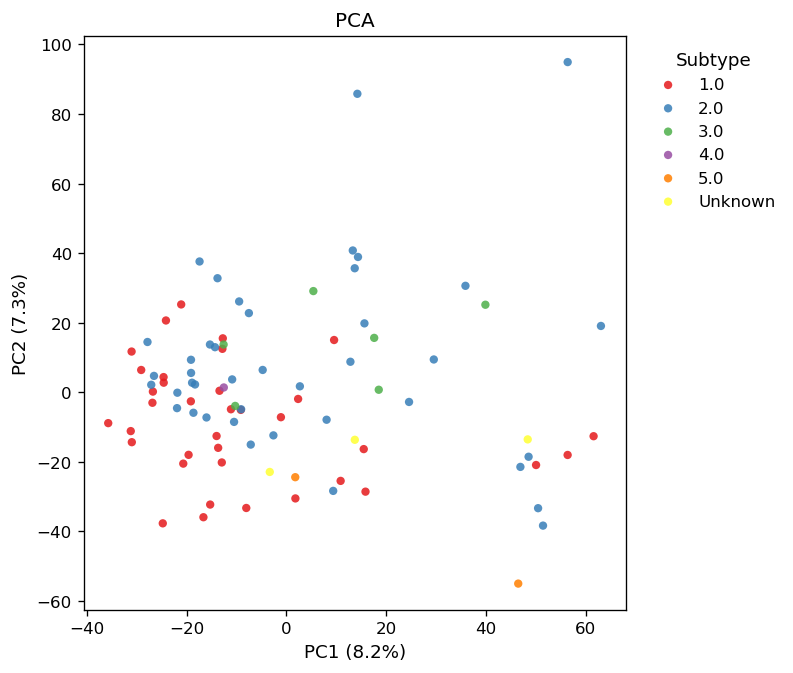

(<Figure size 780x660 with 1 Axes>,
 <Axes: title={'center': 'PCA'}, xlabel='PC1 (8.2%)', ylabel='PC2 (7.3%)'>)

In [27]:
bk.tl.pca(adata, layer="log1p_cpm", n_comps=20, 
         use_highly_variable=False,)                              # typically better to use this
bk.pl.pca(adata, color="Subtype", save="pca_by_subtype.png")

INFO: Running PCA on matrix 89 samples × 2000 genes; n_comps=20
INFO: PCA stored in adata.obsm['X_pca'], adata.varm['PCs'], adata.uns['pca']
INFO: Saved figure: my_figures/pca_by_subtype.png


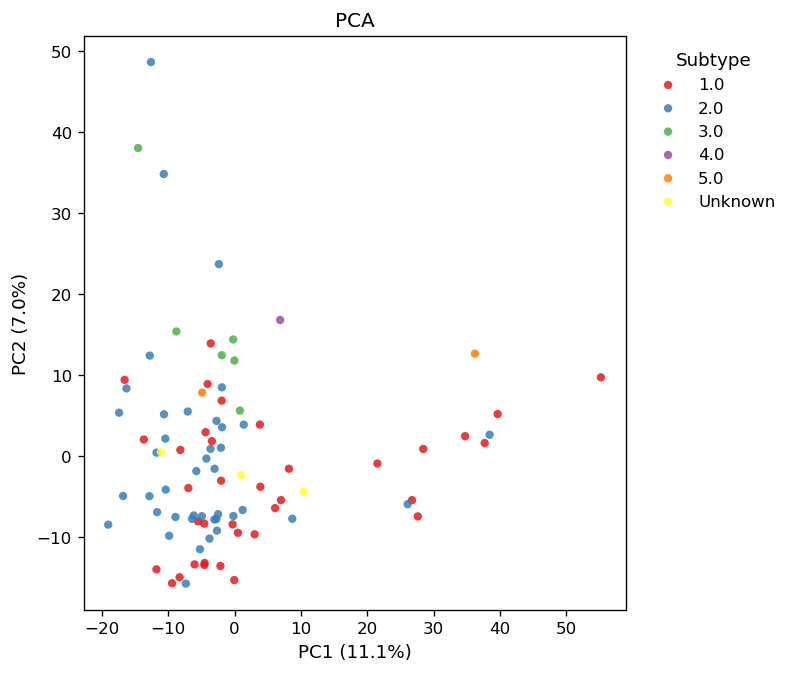

(<Figure size 780x660 with 1 Axes>,
 <Axes: title={'center': 'PCA'}, xlabel='PC1 (11.1%)', ylabel='PC2 (7.0%)'>)

In [28]:
bk.tl.pca(adata, layer="log1p_cpm", n_comps=20, 
         use_highly_variable=True,)                              # typically better to use this
bk.pl.pca(adata, color="Subtype", save="pca_by_subtype.png")

### PCA Variance

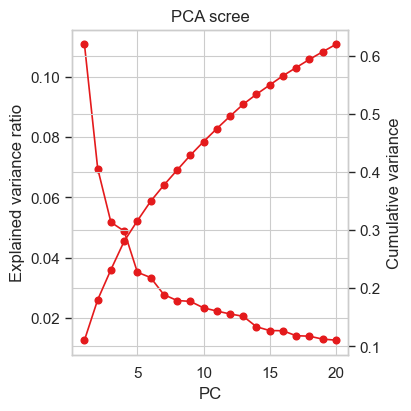

(<Figure size 400x400 with 2 Axes>,
 <Axes: title={'center': 'PCA scree'}, xlabel='PC', ylabel='Explained variance ratio'>)

In [17]:
# 4) scree
bk.pl.pca_variance_ratio(adata, 
                         figsize=(4, 4),
                         save="figs/pca_scree.png")


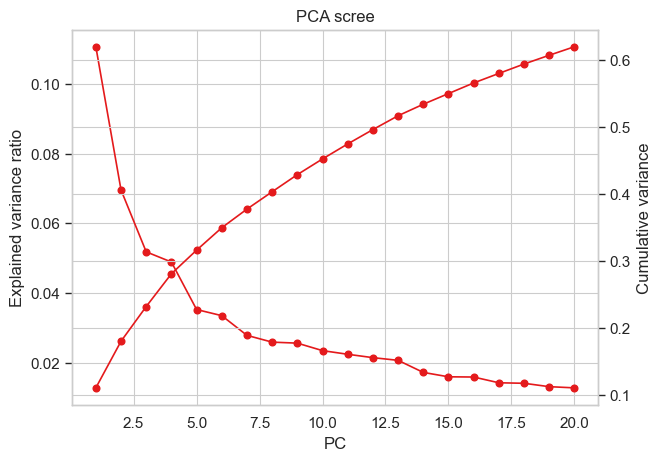

(<Figure size 650x450 with 2 Axes>,
 <Axes: title={'center': 'PCA scree'}, xlabel='PC', ylabel='Explained variance ratio'>)

In [18]:
bk.pl.pca_variance_ratio(adata, key="pca", save="figs/pca_scree.png")

#If you ever call PCA with key_added="pca_hvg", then:
bk.pl.pca_variance_ratio(adata, key="pca_hvg")

### Neighbors and leiden etc.

Common bulk-friendly parameter ranges
	•	n_neighbors: 10–30 (for ~100 samples, 15 is a good start)
	•	resolution:
	•	0.3–0.8 for broader groups
	•	1.0–2.0 for finer subclusters

In [29]:
# PCA already computed
bk.tl.neighbors(adata, n_neighbors=15, n_pcs=20, metric="euclidean")

INFO: Computing neighbors: k=15, rep=X_pca, n_pcs=20, metric=euclidean
INFO: Stored neighbors graph in adata.obsp['distances'] and adata.obsp['connectivities'].


In [30]:
# Try Leiden; if not installed it will fallback to kmeans automatically
bk.tl.cluster(adata, method="leiden", key_added="clusters", resolution=1.0)

INFO: Clustering with Leiden (resolution=1.0)
INFO: Leiden produced 4 clusters stored in adata.obs['clusters'].


INFO: Saved figure: my_figures/pca_clusters.png


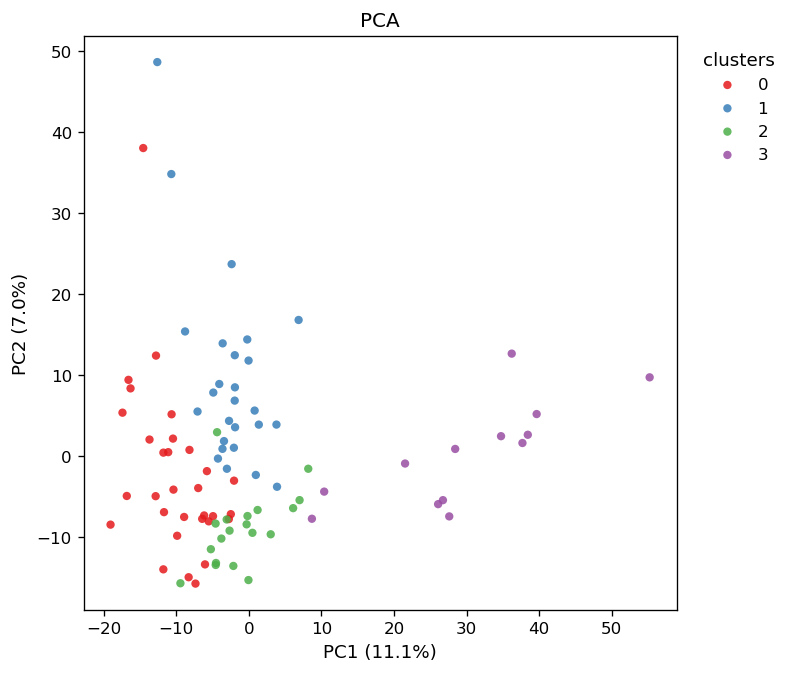

(<Figure size 780x660 with 1 Axes>,
 <Axes: title={'center': 'PCA'}, xlabel='PC1 (11.1%)', ylabel='PC2 (7.0%)'>)

In [31]:
bk.pl.pca(adata, color="clusters", save="pca_clusters.png")

INFO: Saved figure: my_figures/pca_subtype.png


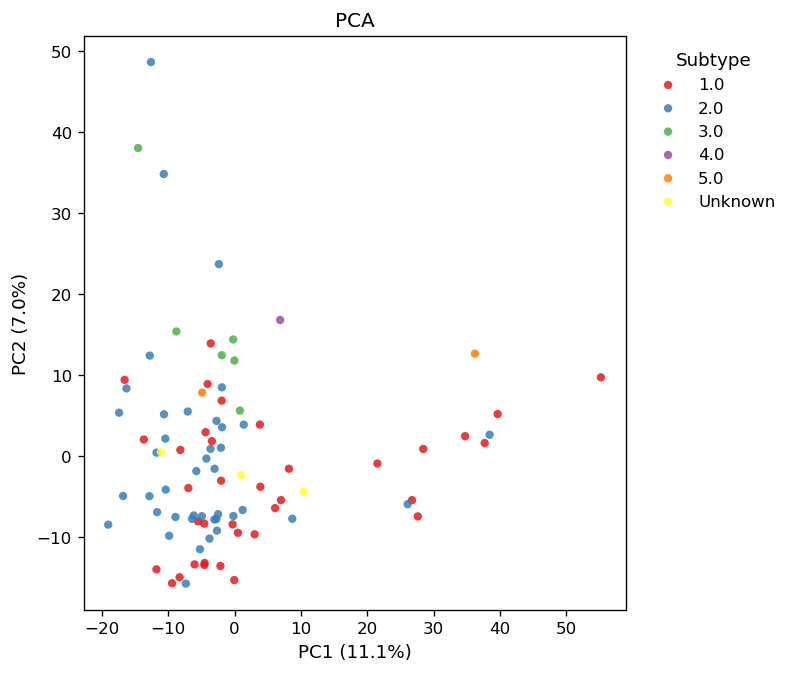

(<Figure size 780x660 with 1 Axes>,
 <Axes: title={'center': 'PCA'}, xlabel='PC1 (11.1%)', ylabel='PC2 (7.0%)'>)

In [32]:
bk.pl.pca(adata, color="Subtype", save="pca_subtype.png")

### UMAP

In [33]:
bk.tl.umap(adata, min_dist=0.01, random_state=0)    #0.3

INFO: Running UMAP (rep=X_pca, n_pcs=20, n_neighbors=15, min_dist=0.01, n_components=2)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


INFO: Saved figure: my_figures/umap_by_subtype.png


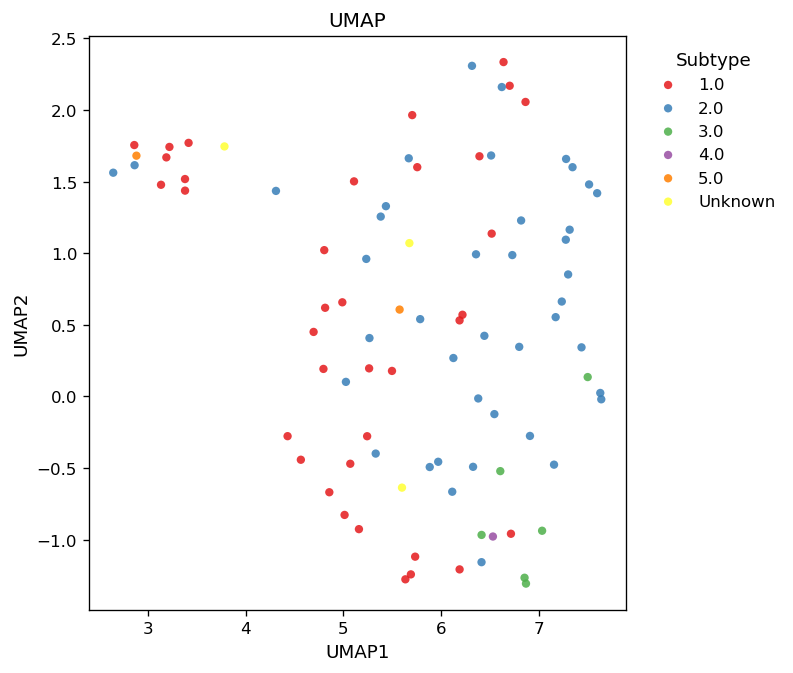

(<Figure size 780x660 with 1 Axes>,
 <Axes: title={'center': 'UMAP'}, xlabel='UMAP1', ylabel='UMAP2'>)

In [34]:
bk.pl.umap(adata, color="Subtype", save="umap_by_subtype.png")     #, save="figs/umap.png"

#### Compare umap & umap_graph:  
- umap: regular, representation-driven, standard
- umap_graph: “Graph-enforced UMAP reveals subtype separation”, topology-preserving, exploratory

In [35]:
bk.tl.umap(
    adata,
    n_neighbors=15,
    n_pcs=20,
    min_dist=0.3,
    random_state=0,
)

INFO: Running UMAP (rep=X_pca, n_pcs=20, n_neighbors=15, min_dist=0.3, n_components=2)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [36]:
bk.tl.umap_graph(
    adata,
    graph_key="connectivities",
    min_dist=0.3,
    random_state=0,
)

INFO: Running graph-based UMAP (graph=connectivities, init=spectral, n_pcs=20, min_dist=0.3, n_components=2)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


INFO: Saved figure: my_figures/umap_standard.png


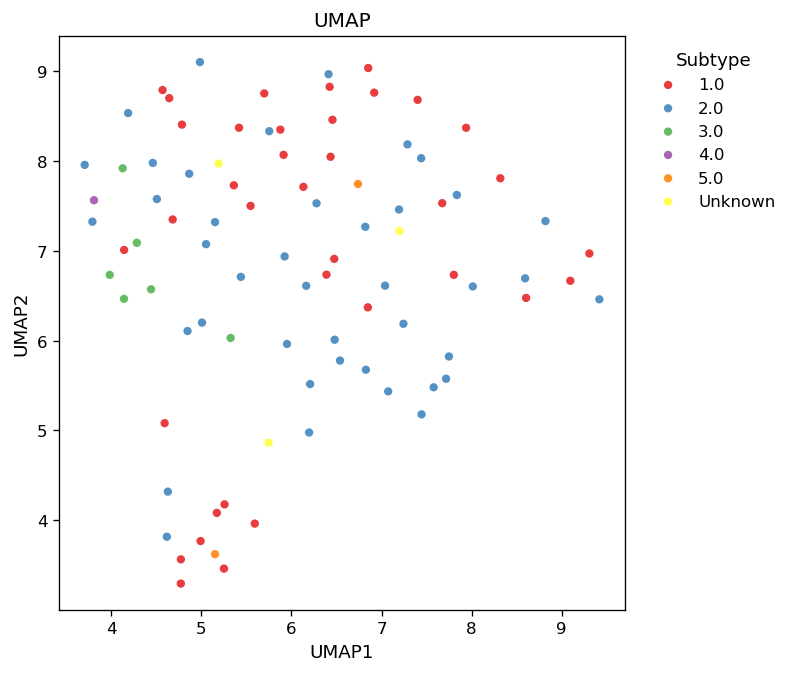

INFO: Saved figure: my_figures/umap_graph.png


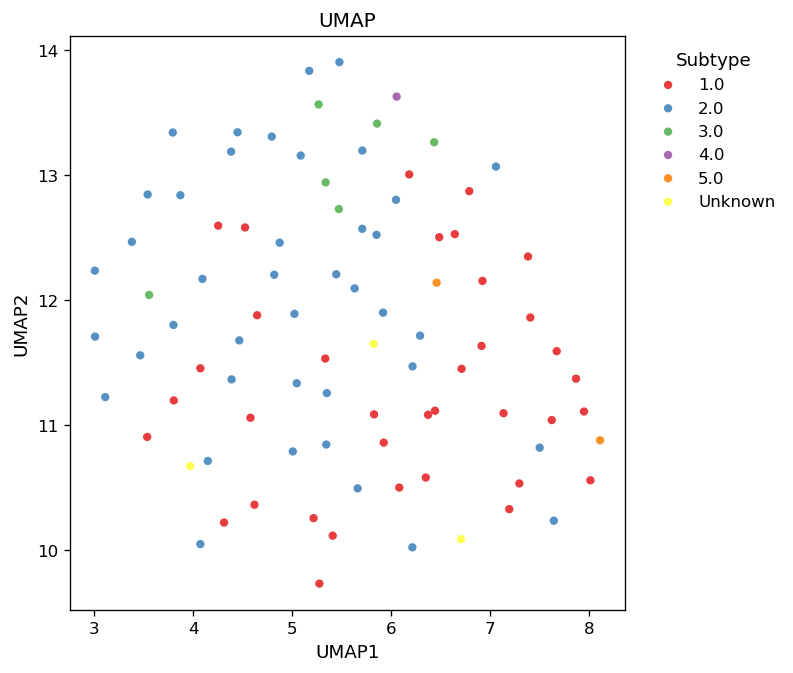

(<Figure size 780x660 with 1 Axes>,
 <Axes: title={'center': 'UMAP'}, xlabel='UMAP1', ylabel='UMAP2'>)

In [37]:
bk.pl.umap(adata, basis="X_umap", color="Subtype", save="umap_standard.png")
bk.pl.umap(adata, basis="X_umap_graph", color="Subtype", save="umap_graph.png")

### leiden

In [38]:
bk.tl.cluster(
    adata,
    method="leiden",
    key_added="leiden",
    resolution=1.0,
    random_state=0,
)

INFO: Clustering with Leiden (resolution=1.0)
INFO: Leiden produced 4 clusters stored in adata.obs['leiden'].


INFO: Saved figure: my_figures/pca_leiden.png


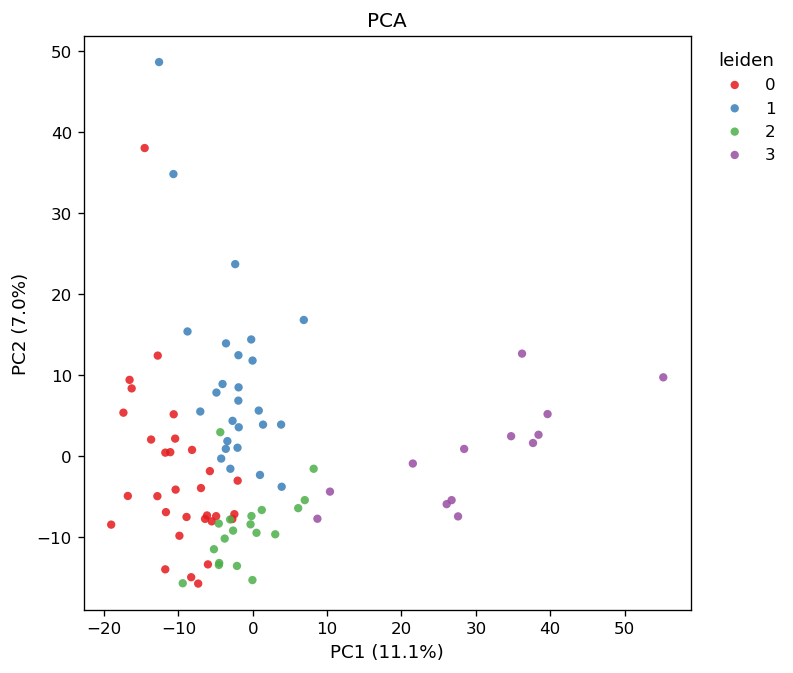

INFO: Saved figure: my_figures/umap_leiden_standard.png


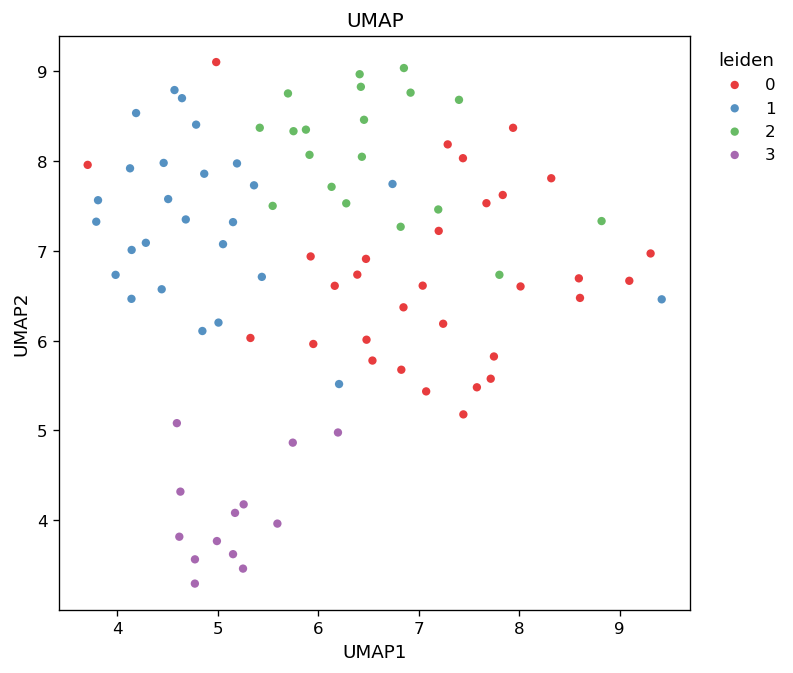

INFO: Saved figure: my_figures/umap_leiden_graph.png


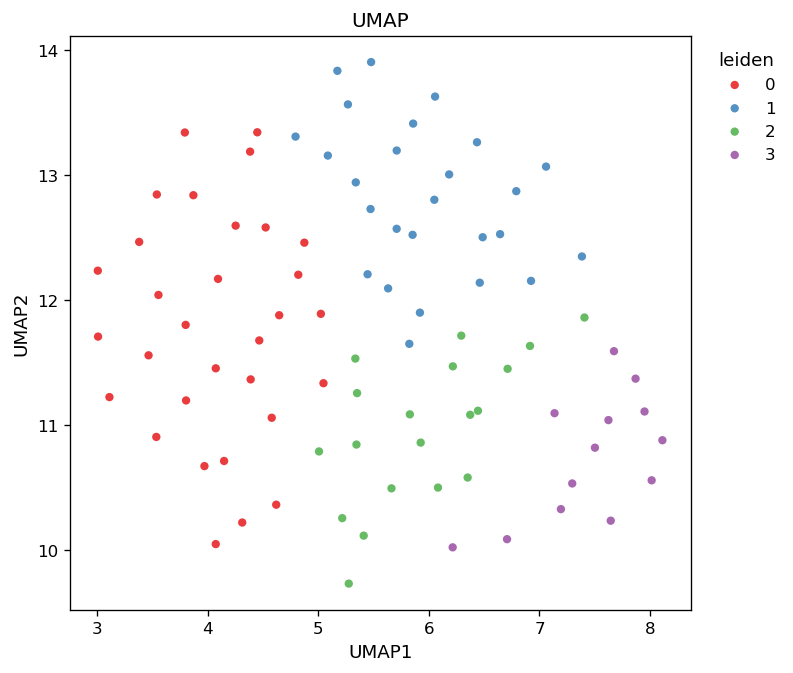

(<Figure size 780x660 with 1 Axes>,
 <Axes: title={'center': 'UMAP'}, xlabel='UMAP1', ylabel='UMAP2'>)

In [39]:
bk.pl.pca(adata, color="leiden", save="pca_leiden.png")

bk.pl.umap(adata, basis="X_umap", color="leiden", save="umap_leiden_standard.png")
bk.pl.umap(adata, basis="X_umap_graph", color="leiden", save="umap_leiden_graph.png")

In [40]:
# Compare with Subtype
pd.crosstab(adata.obs["Subtype"], adata.obs["leiden"])

leiden,0,1,2,3
Subtype,,,,
1.0,9,6,13,8
2.0,20,12,6,3
3.0,1,5,0,0
4.0,0,1,0,0
5.0,0,1,0,1
Unknown,1,1,0,1


In [ ]:
# SAVE

# 5. Differential expression

Alright — next is DE. For bulk RNA-seq, the two most useful layers are:  
	•	a fast exploratory DE (like Scanpy’s “rank genes” idea) → Welch t-test on log1p_cpm  
	•	a proper bulk model → Negative Binomial GLM (DESeq2/edgeR spirit) on raw counts with library-size offset  

Quick best-practice recommendation  

Use:  
	•	welch_ttest for fast exploration and ranking  
	•	NB GLM only if we either (a) estimate alpha properly, or (b) accept that it’s an approximate baseline  

In [5]:
# Fast exploratory (recommended first)
bk.tl.de(
    adata,
    groupby="Subtype_PAM50",
    group="LumB",               # "Basal" etc.
    reference="LumA",
    method="welch_ttest",
    layer_expr="log1p_cpm",
)

res = adata.uns["de"]["LumB_vs_LumA"]["results"]
res.head(20)

INFO: DE (welch_ttest) on layer='log1p_cpm'
INFO: Stored DE results (welch_ttest) in adata.uns['de']['LumB_vs_LumA'].


,gene,log2FC,t,pval,qval,mean_group,mean_ref
29504,TPX2,0.824146,8.389332,5.631417e-12,1.791185e-07,4.056184,3.232038
4463,CLSPN,0.827574,7.802931,3.296685e-11,5.242884e-07,3.836361,3.008786
3974,CENPI,0.729711,7.633546,6.925505e-11,7.342651e-07,3.756181,3.026471
3855,CDK1,0.724888,7.339478,2.372429e-10,1.886496e-06,4.094374,3.369487
14932,NCAPG,0.767055,7.407265,3.036893e-10,1.931889e-06,3.375680,2.608625
25896,RRM2,0.920382,7.226901,4.803969e-10,2.546664e-06,4.083170,3.162787
3823,CDCA8,0.763522,7.103934,7.085459e-10,3.219531e-06,3.600321,2.836799
2563,BIRC5,1.063761,7.106155,9.208956e-10,3.661366e-06,3.390944,2.327183
11214,KIF4A,0.782593,7.000134,2.239883e-09,7.915996e-06,3.339022,2.556430
26747,SKA3,0.711597,6.723045,3.459199e-09,1.000243e-05,2.395544,1.683948


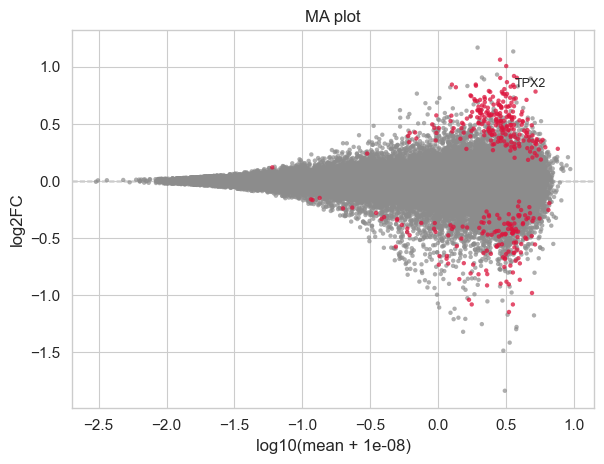

(<Figure size 620x480 with 1 Axes>,
 <Axes: title={'center': 'MA plot'}, xlabel='log10(mean + 1e-08)', ylabel='log2FC'>)

In [8]:
bk.pl.ma(
    res,
    mean_col="mean",     # auto computed = 0.5*(mean_group + mean_ref)
    fc_col="log2FC",
    use="qval",
    alpha=0.05,
    label_top_n=1,
    label_by="qval",
    save="figs/ma_LumB_vs_LumA.png",
)

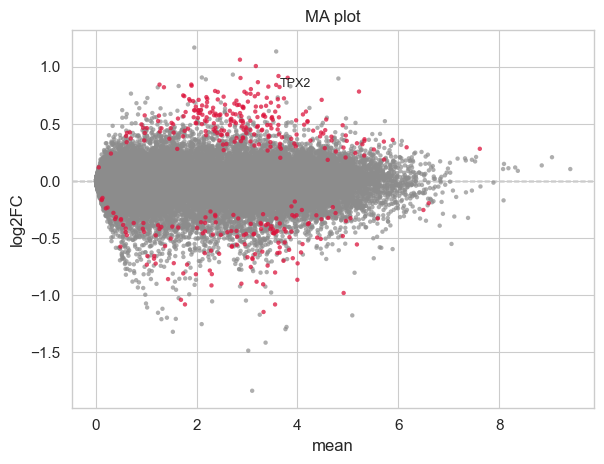

(<Figure size 620x480 with 1 Axes>,
 <Axes: title={'center': 'MA plot'}, xlabel='mean', ylabel='log2FC'>)

In [9]:
# If you want the MA plot to show the raw mean on x (no log10), set log_mean=False.
bk.pl.ma(
    res,
    mean_col="mean",     # auto computed = 0.5*(mean_group + mean_ref)
    fc_col="log2FC",
    use="qval",
    alpha=0.05,
    label_top_n=1,
    label_by="qval",
    log_mean=False,
    save="figs/ma_LumB_vs_LumA.png",
)

In [ ]:
NB Model  
This is DESeq2-like, not a full DESeq2 reimplementation:  
	•	DESeq2 does more sophisticated dispersion fitting + shrinkage + outlier handling.  
	•	But for many cohorts, this is already a big leap from “alpha=1”.  

In [11]:
# Proper NB model (bulk)

bk.tl.de(
    adata,
    groupby="Subtype_PAM50",
    group="LumB",
    reference="LumA",
    method="nb_glm",
    layer_counts="counts",
    shrink_dispersion=True,
    prior_df=10.0,
)

res = adata.uns["de"]["LumB_vs_LumA"]["results"]
res.head(20)

INFO: DE (nb_glm, deseq2-like) on raw counts layer='counts'
INFO: Stored DE results (nb_glm) in adata.uns['de']['LumB_vs_LumA'].


,gene,log2FC,se,pval,qval,dispersion,mean_norm
31035,ZDHHC22,4.992445,0.356943,0.0,0.0,0.420683,3.948581
20292,RP11-170M17.1,-4.255910,0.289305,0.0,0.0,0.478953,4.023115
13038,LORICRIN,-4.472937,0.244461,0.0,0.0,1.096914,133.315159
27160,SLCO1A2,3.851388,0.320649,0.0,0.0,0.406364,2.776069
17859,PXDNL,-2.614611,0.196480,0.0,0.0,0.574496,12.368973
2466,BCHE,3.453477,0.215032,0.0,0.0,0.730530,23.270284
1007,ADGRD2,-6.445718,0.443859,0.0,0.0,0.518568,5.525202
27131,SLC7A3,-3.400808,0.264091,0.0,0.0,0.378287,2.719374
13010,LMOD2,-4.806352,0.332905,0.0,0.0,0.447746,3.753752
27185,SLIT1,2.534707,0.198298,0.0,0.0,0.634825,19.401834


#### multi-factor DE with a design matrix + contrasts, bulk-style.  
We’ll implement:  
	•	bk.tl.de_glm(...) using NB GLM + DESeq2-like size factors + dispersion (the improved engine),  
	•	supports formulas like ~ Subtype + Batch (and later interactions),  
	•	and a contrast like ("Subtype", "Basal", "Luminal").  

This is the bulk equivalent of “design matrix + contrast” from DESeq2/edgeR/limma.  

In [20]:
# Make sure covariates are categorical where appropriate
adata.obs["Subtype_PAM50"] = adata.obs["Subtype_PAM50"].astype("category")
adata.obs["Batch"] = adata.obs["Batch"].astype("category")   # if you have it

In [21]:
# Run DE adjusted for Batch
bk.tl.de_glm(
    adata,
    formula="~ Subtype_PAM50 + Batch",
    contrast=("Subtype_PAM50", "LumB", "LumA"),
    layer_counts="counts",
    shrink_dispersion=True,
    prior_df=10.0,
)
res = adata.uns["de_glm"]["Subtype_PAM50:LumB_vs_LumA"]["results"]
res.head(25)

INFO: DE GLM (NB) with formula='~ Subtype_PAM50 + Batch', layer_counts='counts'
/Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/MM01_BULLKpy/bullkpy-skeleton/src/bullkpy/tl/de_glm.py:105: RuntimeWarning: invalid value encountered in sqrt
  den = float(np.sqrt(c @ cov @ c))
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/statsmodels/genmod/families/varfuncs.py:265: RuntimeWarning: overflow encountered in square
  return p + self.alpha*p**2
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/statsmodels/genmod/fam

,gene,log2FC,wald_z,pval,qval,dispersion,mean_norm
28757,TGM5,-3.621840,-9.369831,0.0,0.0,0.672938,9.993248
2659,BPIFC,-3.451204,-8.883162,0.0,0.0,0.789735,23.457689
27801,SPRR2A,-4.716674,-8.835510,0.0,0.0,1.164693,161.755365
30690,WIF1,-3.664531,-11.182485,0.0,0.0,0.711097,22.133734
15139,NEUROD1,6.524039,8.513882,0.0,0.0,0.607996,5.418752
11792,LINC00052,3.128890,9.410115,0.0,0.0,0.735305,19.280423
4607,COL17A1,-3.009456,-9.590121,0.0,0.0,0.749093,34.809937
26132,SBSN,-3.542010,-9.434779,0.0,0.0,1.134791,229.582630
8280,FLG2,-5.182927,-13.095073,0.0,0.0,0.855149,55.521362
11638,LCE2D,-4.775212,-9.184337,0.0,0.0,0.660477,7.600609


In [8]:
# If you don’t have Batch, just:
bk.tl.de_glm(
    adata,
    formula="~ Subtype_PAM50",
    contrast=("Subtype_PAM50", "LumB", "LumA"),
)

INFO: DE GLM (NB) with formula='~ Subtype', layer_counts='counts'
INFO: Stored DE GLM results in adata.uns['de_glm']['Subtype:1.0_vs_2.0'].


In [22]:
res.query("qval < 0.05").head(20)

,gene,log2FC,wald_z,pval,qval,dispersion,mean_norm
28757,TGM5,-3.621840,-9.369831,0.0,0.0,0.672938,9.993248
2659,BPIFC,-3.451204,-8.883162,0.0,0.0,0.789735,23.457689
27801,SPRR2A,-4.716674,-8.835510,0.0,0.0,1.164693,161.755365
30690,WIF1,-3.664531,-11.182485,0.0,0.0,0.711097,22.133734
15139,NEUROD1,6.524039,8.513882,0.0,0.0,0.607996,5.418752
11792,LINC00052,3.128890,9.410115,0.0,0.0,0.735305,19.280423
4607,COL17A1,-3.009456,-9.590121,0.0,0.0,0.749093,34.809937
26132,SBSN,-3.542010,-9.434779,0.0,0.0,1.134791,229.582630
8280,FLG2,-5.182927,-13.095073,0.0,0.0,0.855149,55.521362
11638,LCE2D,-4.775212,-9.184337,0.0,0.0,0.660477,7.600609


This initial formula parser supports ~ A + B + C with:  
	•	categorical → dummy-coded (reference = first category)  
	•	numeric → included as-is  

No interactions yet (A:B) and no random effects. If you later want patient-paired designs, we’ll add that as a dedicated mode.  

If you tell me your typical covariates (Batch, sex, site, patient ID?), I’ll harden the defaults for your use case.  

### PLots

<Figure size 640x480 with 0 Axes>

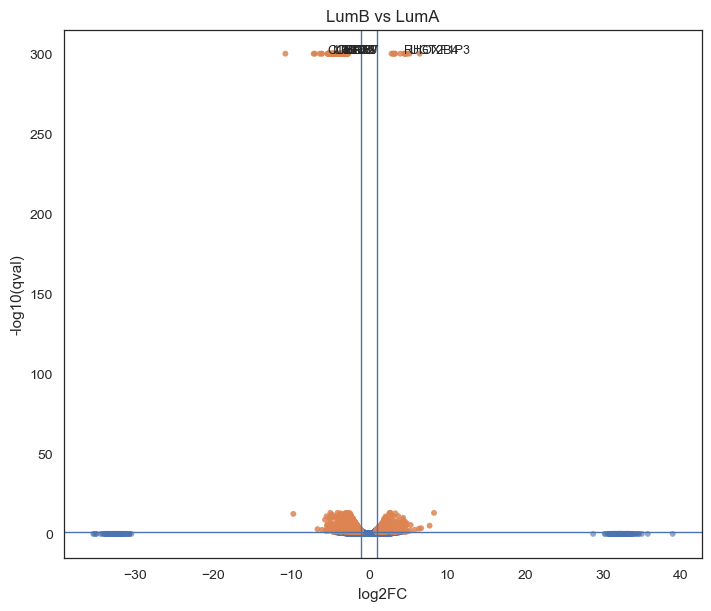

(<Figure size 700x600 with 1 Axes>,
 <Axes: title={'center': 'LumB vs LumA'}, xlabel='log2FC', ylabel='-log10(qval)'>)

In [23]:
bk.pl.volcano(result=res, title="LumB vs LumA", save="volcano.png")

<Figure size 640x480 with 0 Axes>

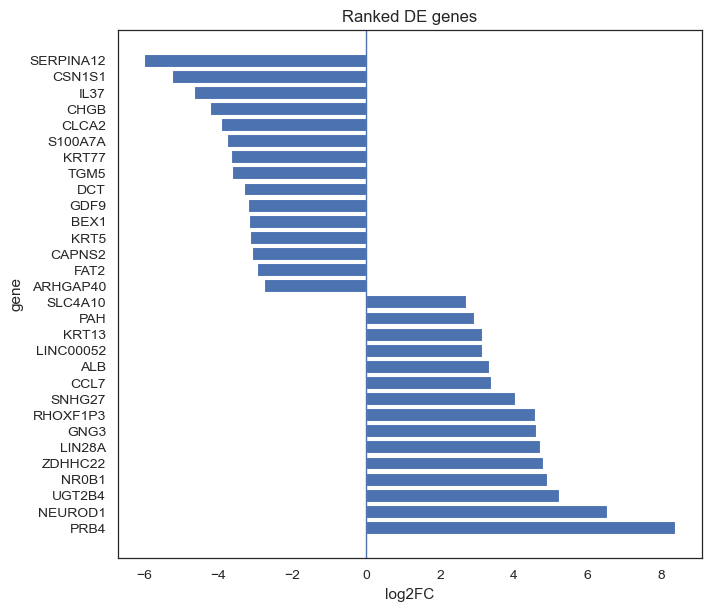

(<Figure size 700x600 with 1 Axes>,
 <Axes: title={'center': 'Ranked DE genes'}, xlabel='log2FC', ylabel='gene'>)

In [24]:
bk.pl.rankplot(result=res, n_genes=30, direction="both", save="rankplot.png")

If results are stored in adata.uns["de_glm"]

<Figure size 640x480 with 0 Axes>

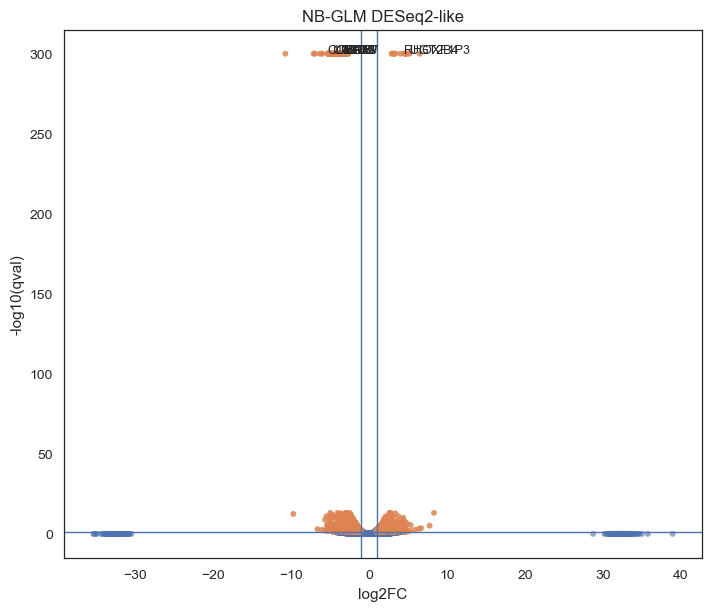

<Figure size 640x480 with 0 Axes>

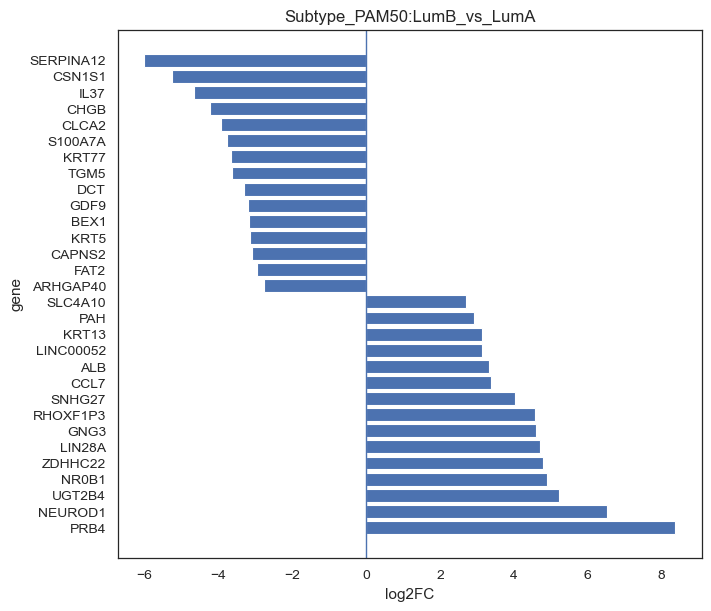

(<Figure size 700x600 with 1 Axes>,
 <Axes: title={'center': 'Subtype_PAM50:LumB_vs_LumA'}, xlabel='log2FC', ylabel='gene'>)

In [25]:
bk.pl.volcano(adata, uns_key="de_glm", contrast="Subtype_PAM50:LumB_vs_LumA",
              title="NB-GLM DESeq2-like", save="volcano_glm.png")

bk.pl.rankplot(adata, uns_key="de_glm", contrast="Subtype_PAM50:LumB_vs_LumA",
               n_genes=30, direction="both", save="rankplot_glm.png")

In [ ]:
Label specific genes

<Figure size 640x480 with 0 Axes>

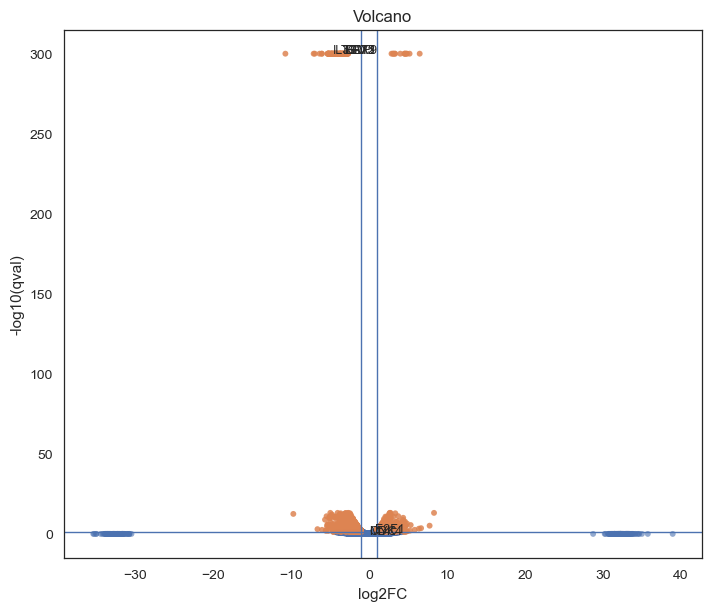

(<Figure size 700x600 with 1 Axes>,
 <Axes: title={'center': 'Volcano'}, xlabel='log2FC', ylabel='-log10(qval)'>)

In [26]:
bk.pl.volcano(result=res, label_genes=["MYC", "E2F1", "CDK4"], top_n_labels=5)

# 6. Additional Plots

## 6.1. Dotplot

In [5]:
# Check if genes have zeros (e.g. Fraction of samples expressing is not 1)

genes = ["CDK1","MKI67","CD3E","CD79A","MS4A1"]
gidx = [adata.var_names.get_loc(g) for g in genes]
X = adata.layers["counts"][:, gidx]
X = X.toarray() if hasattr(X, "toarray") else np.asarray(X)

print("fraction >0 per gene:", (X > 0).mean(axis=0))
print("min/max counts per gene:", X.min(axis=0), X.max(axis=0))

fraction >0 per gene: [1.         1.         0.98876404 0.88764045 0.88764045]
min/max counts per gene: [5 2 0 0 0] [1156 1003  195  383  966]


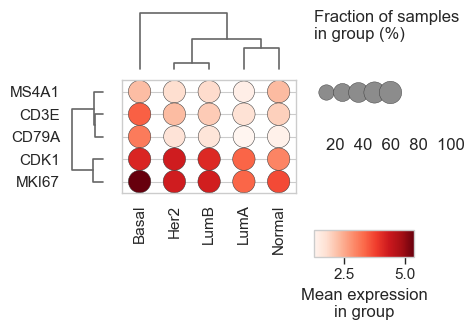

(<Figure size 615x475 with 5 Axes>, <Axes: >)

In [6]:
bk.pl.dotplot(
    adata,
    var_names=["CDK1","MKI67","CD3E","CD79A","MS4A1"],
    groupby="Subtype_PAM50",
    swap_axes=True,
    row_spacing = 0.4,
    dendrogram_top=True,
    dendrogram_rows=True,
    row_dendrogram_position="outer_left",
    title=None,
)

In [7]:
markers = {
    "B-cell": ["CD79A","MS4A1"],
    "Dendritic": ["FCER1A"],
    "Monocytes": ["CST3","FCGR3A"],
    "NK": ["GNLY","NKG7"],
    "Other": ["IGLL1"],
    "T-cell": ["CD3D"],
}

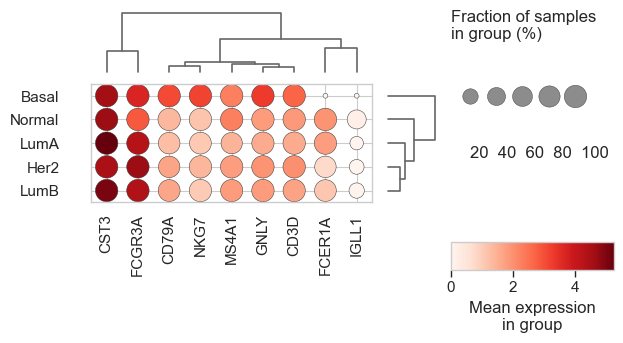

(<Figure size 835x475 with 5 Axes>, <Axes: >)

In [8]:
#var_groups dict (Scanpy-like brackets + ordering)

bk.pl.dotplot(
    adata,
    var_groups=markers,
    groupby="Subtype_PAM50",
    swap_axes=False,
    row_spacing = 0.4,
    dendrogram_rows=True,  # cluster groups
    dendrogram_top=True,  # cluster genes within the full list (still keeps brackets)
    save="figs/dotplot_scanpy_like.png",
)

### CHECK MARKERS DICT GROUPS WITH NO DENDRIMGRAM

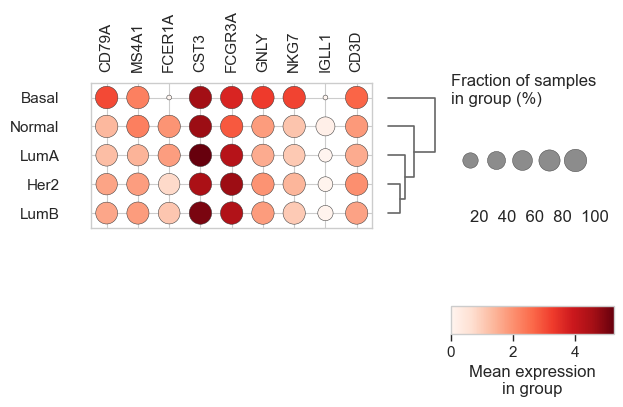

(<Figure size 835x475 with 4 Axes>, <Axes: >)

In [12]:
bk.pl.dotplot(
    adata,
    var_groups=markers,
    groupby="Subtype_PAM50",
    swap_axes=False,
    row_spacing = 0.4,
    dendrogram_rows=True,  # cluster groups
    dendrogram_top=False,  # cluster genes within the full list (still keeps brackets)
    save="figs/dotplot_scanpy_like.png",
)

## 6.2. Heatmap

In [13]:
res.columns.tolist()

['gene', 'log2FC', 't', 'pval', 'qval', 'mean_group', 'mean_ref']

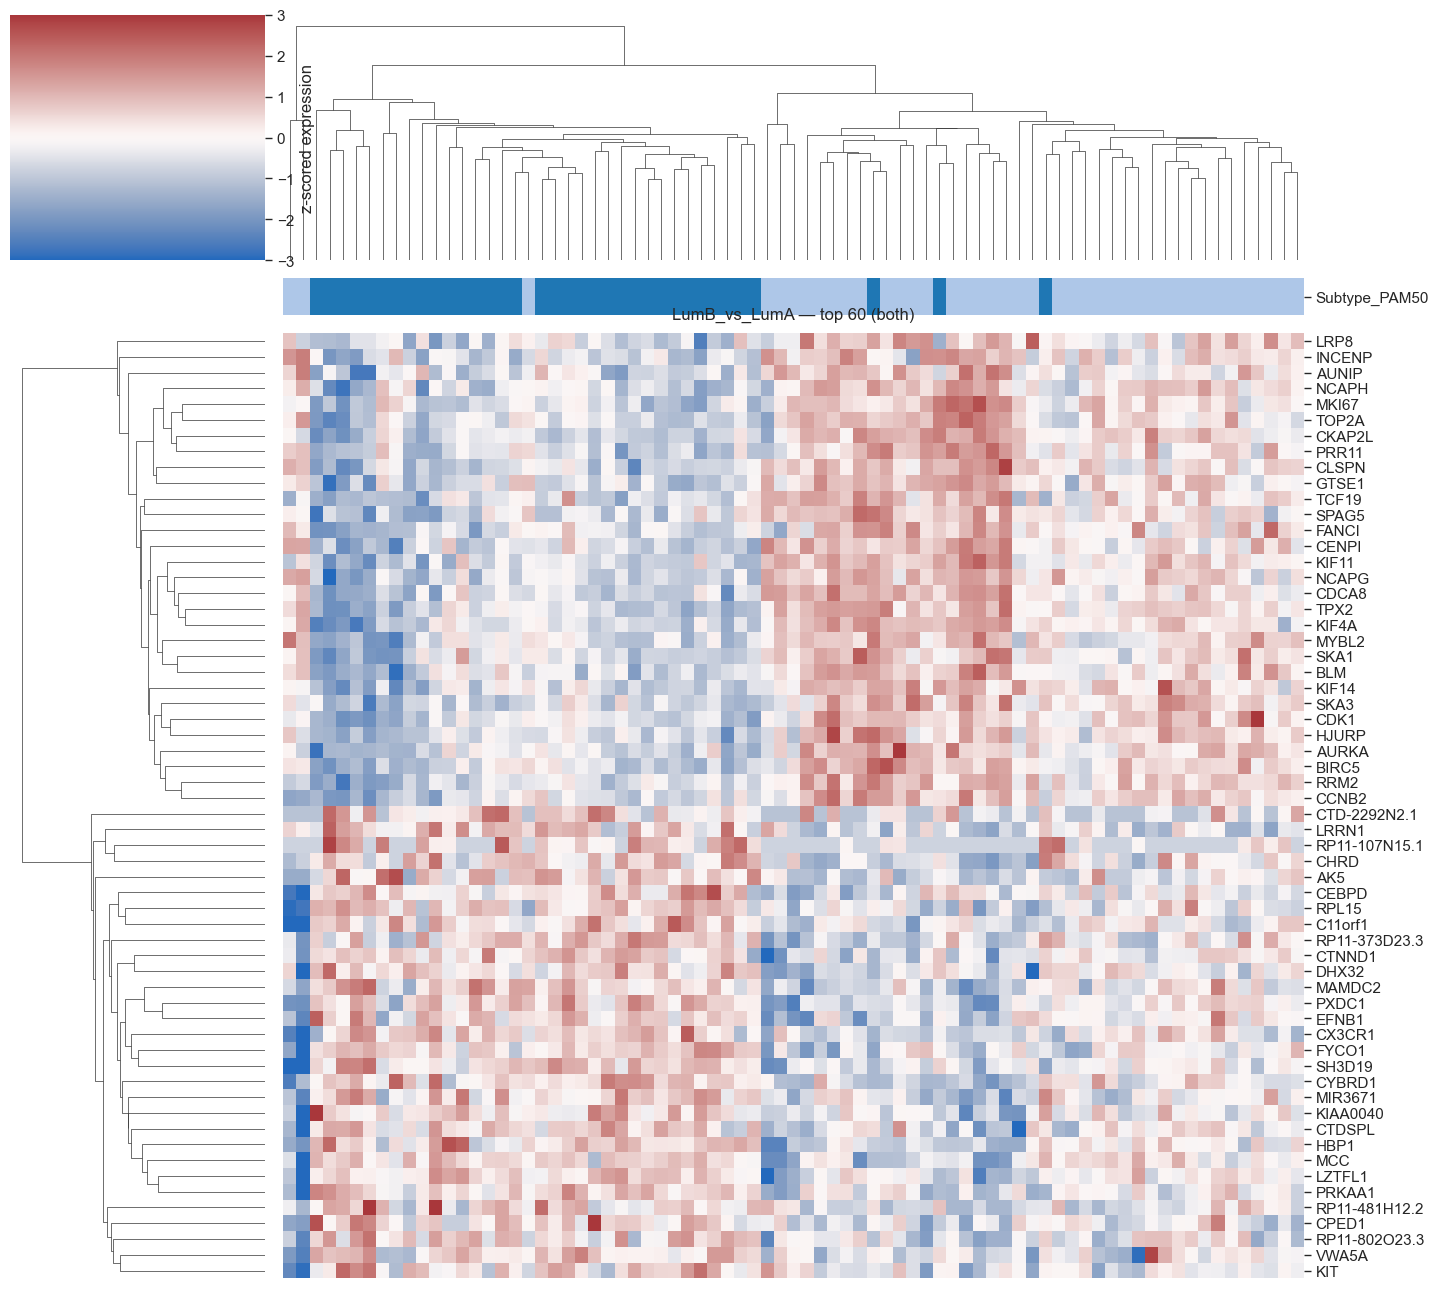

In [14]:
# 2) heatmap of top DE genes
bk.pl.heatmap_de(
    adata,
    contrast="LumB_vs_LumA",
    groupby="Subtype_PAM50",
    groups=["LumA", "LumB"],
    layer="log1p_cpm",
    top_n=60,
    mode="both",
    col_colors=["Subtype_PAM50"],
)


## 6.3. Violin plot

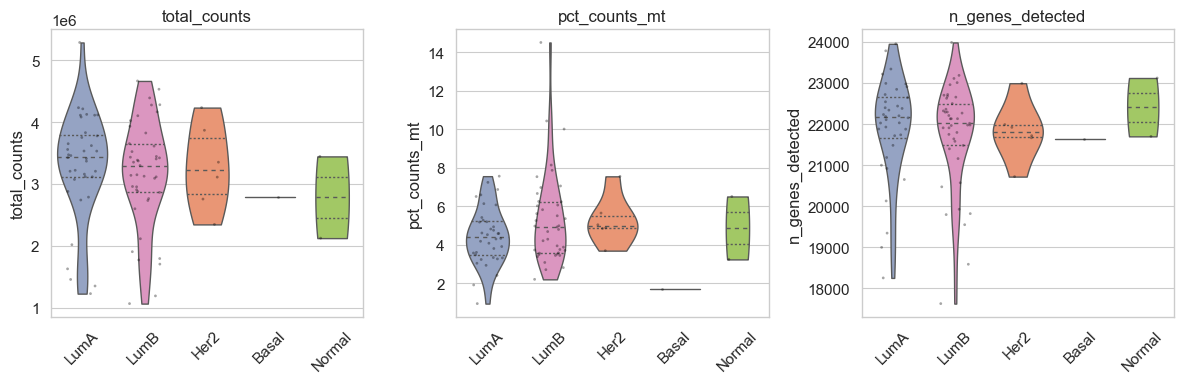

(<Figure size 1200x400 with 3 Axes>,
 array([<Axes: title={'center': 'total_counts'}, ylabel='total_counts'>,
        <Axes: title={'center': 'pct_counts_mt'}, ylabel='pct_counts_mt'>,
        <Axes: title={'center': 'n_genes_detected'}, ylabel='n_genes_detected'>],
       dtype=object))

In [14]:
bk.pl.violin(
    adata,
    keys=["total_counts", "pct_counts_mt", "n_genes_detected"],
    groupby="Subtype_PAM50",
    order=["LumA", "LumB", "Her2", "Basal", "Normal"],
    #figsize=(6, 3),
    save="figs/violin_qc.png",
)

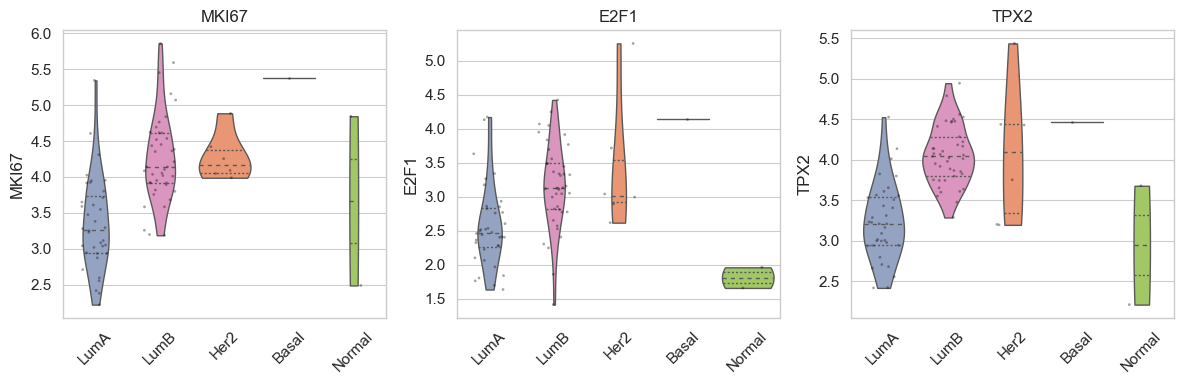

(<Figure size 1200x400 with 3 Axes>,
 array([<Axes: title={'center': 'MKI67'}, ylabel='MKI67'>,
        <Axes: title={'center': 'E2F1'}, ylabel='E2F1'>,
        <Axes: title={'center': 'TPX2'}, ylabel='TPX2'>], dtype=object))

In [13]:
bk.pl.violin_genes(adata, genes=["MKI67","E2F1", "TPX2"], groupby="Subtype_PAM50", 
                   order=["LumA", "LumB", "Her2", "Basal", "Normal"],
                   layer="log1p_cpm",
                   #figsize=(3, 4),
                   save="figs/violin_genes.png")

## 6.4. Sample distances

A) Sample distances (Euclidean on log1p_cpm) + metadata colors

UnboundLocalError: local variable 'plt' referenced before assignment

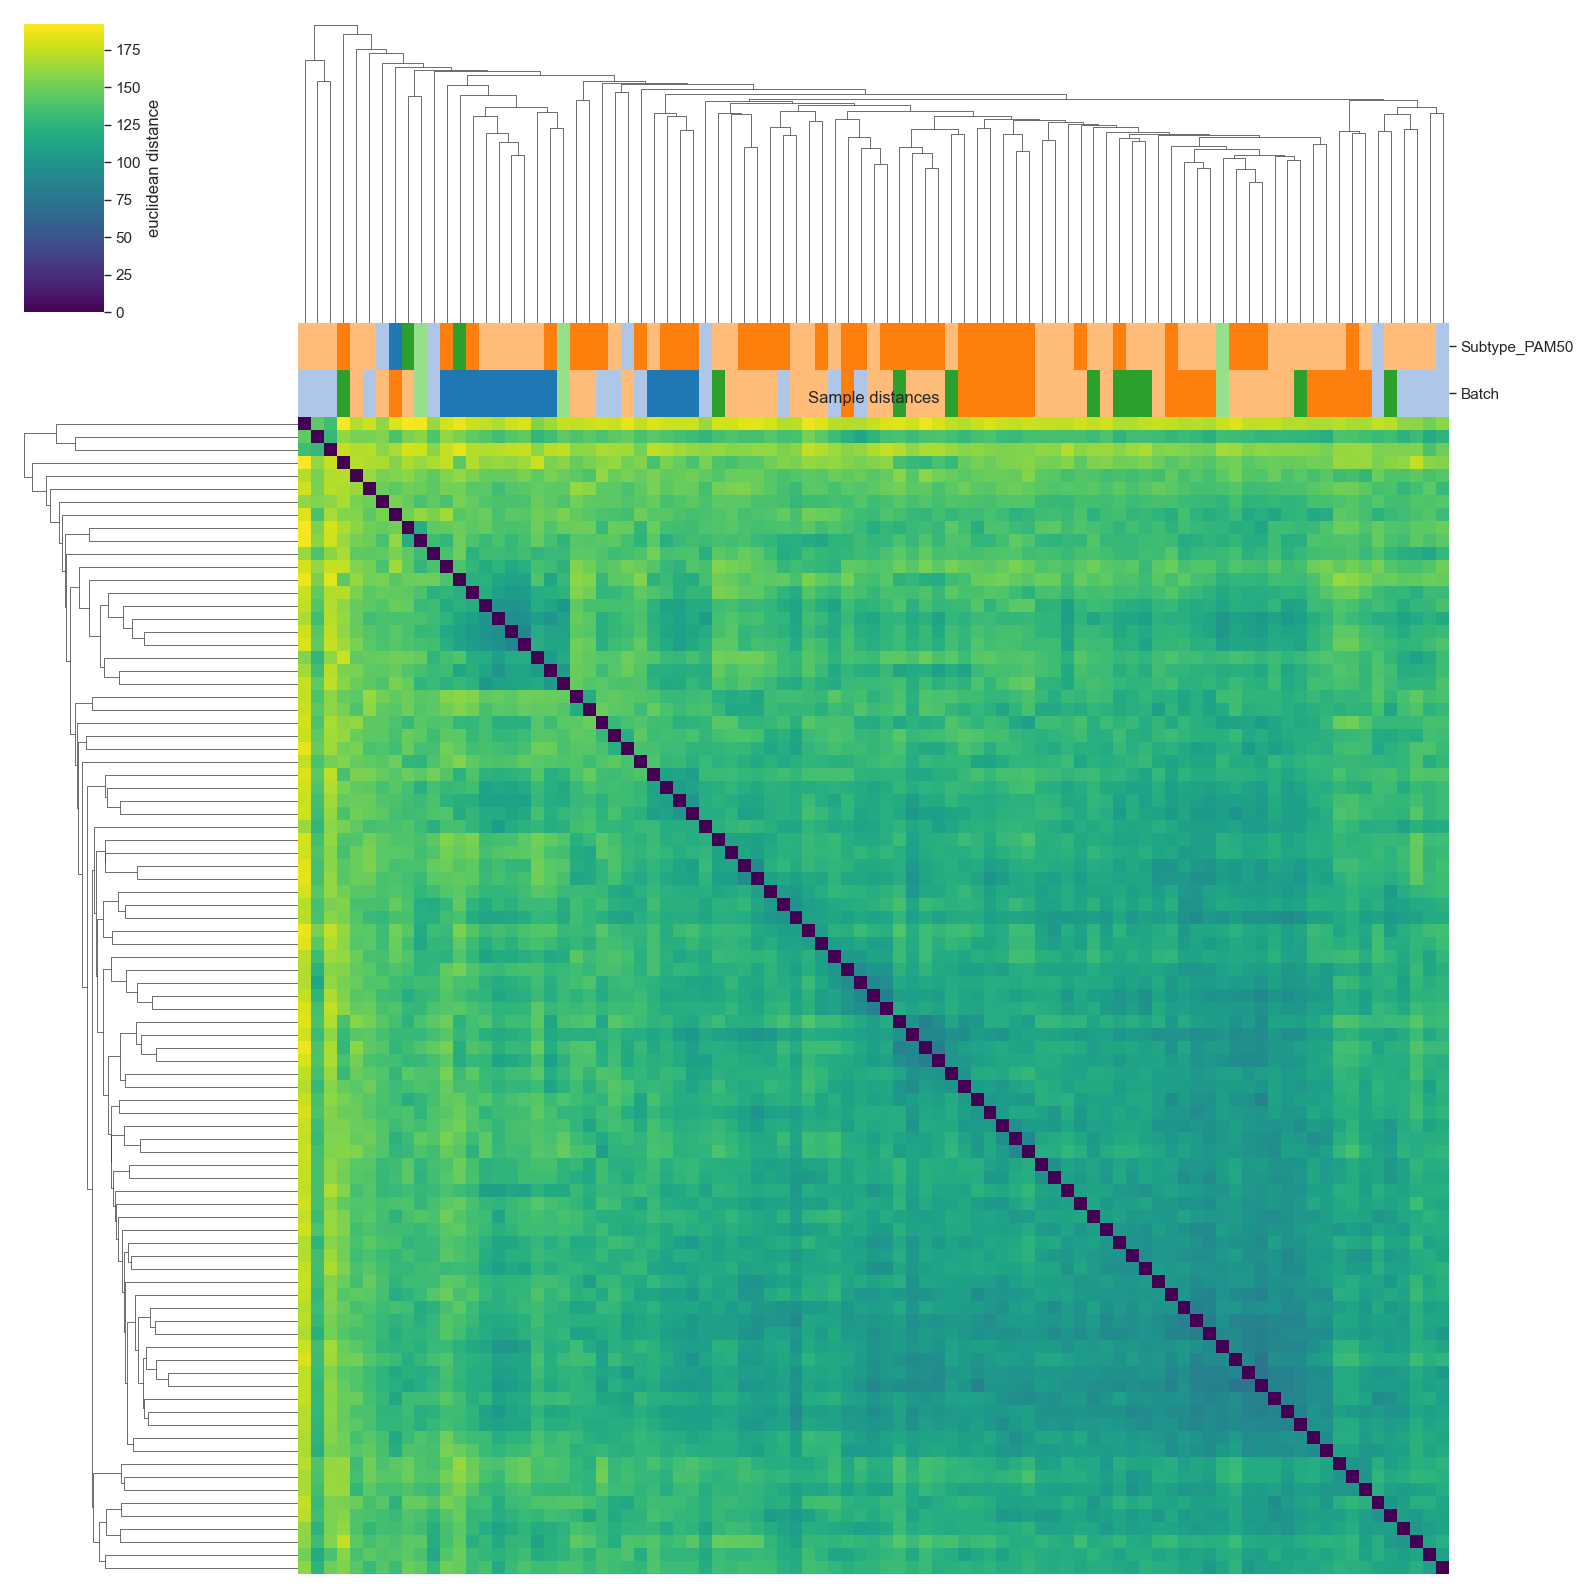

In [5]:
bk.pl.sample_distances(
    adata,
    layer="log1p_cpm",
    metric="euclidean",
    method="average",
    col_colors=["Subtype_PAM50", "Batch"],
    show_labels=False,
    save="figs/sample_distances.png",
)

B) Sample correlation clustergram (recommended for bulk QC)

In [ ]:
bk.pl.sample_correlation_clustergram(
    adata,
    layer="log1p_cpm",
    method="pearson",
    col_colors=["Subtype_PAM50", "Batch"],
    show_labels=False,
    save="figs/sample_corr_clustergram.png",
)

C) Spearman correlation version (robust)

In [ ]:
bk.pl.sample_correlation_clustergram(
    adata,
    layer="log1p_cpm",
    method="spearman",
    col_colors=["Subtype_PAM50"],
    save="figs/sample_corr_spearman.png",
)

## 6.5. Correlation heatmap

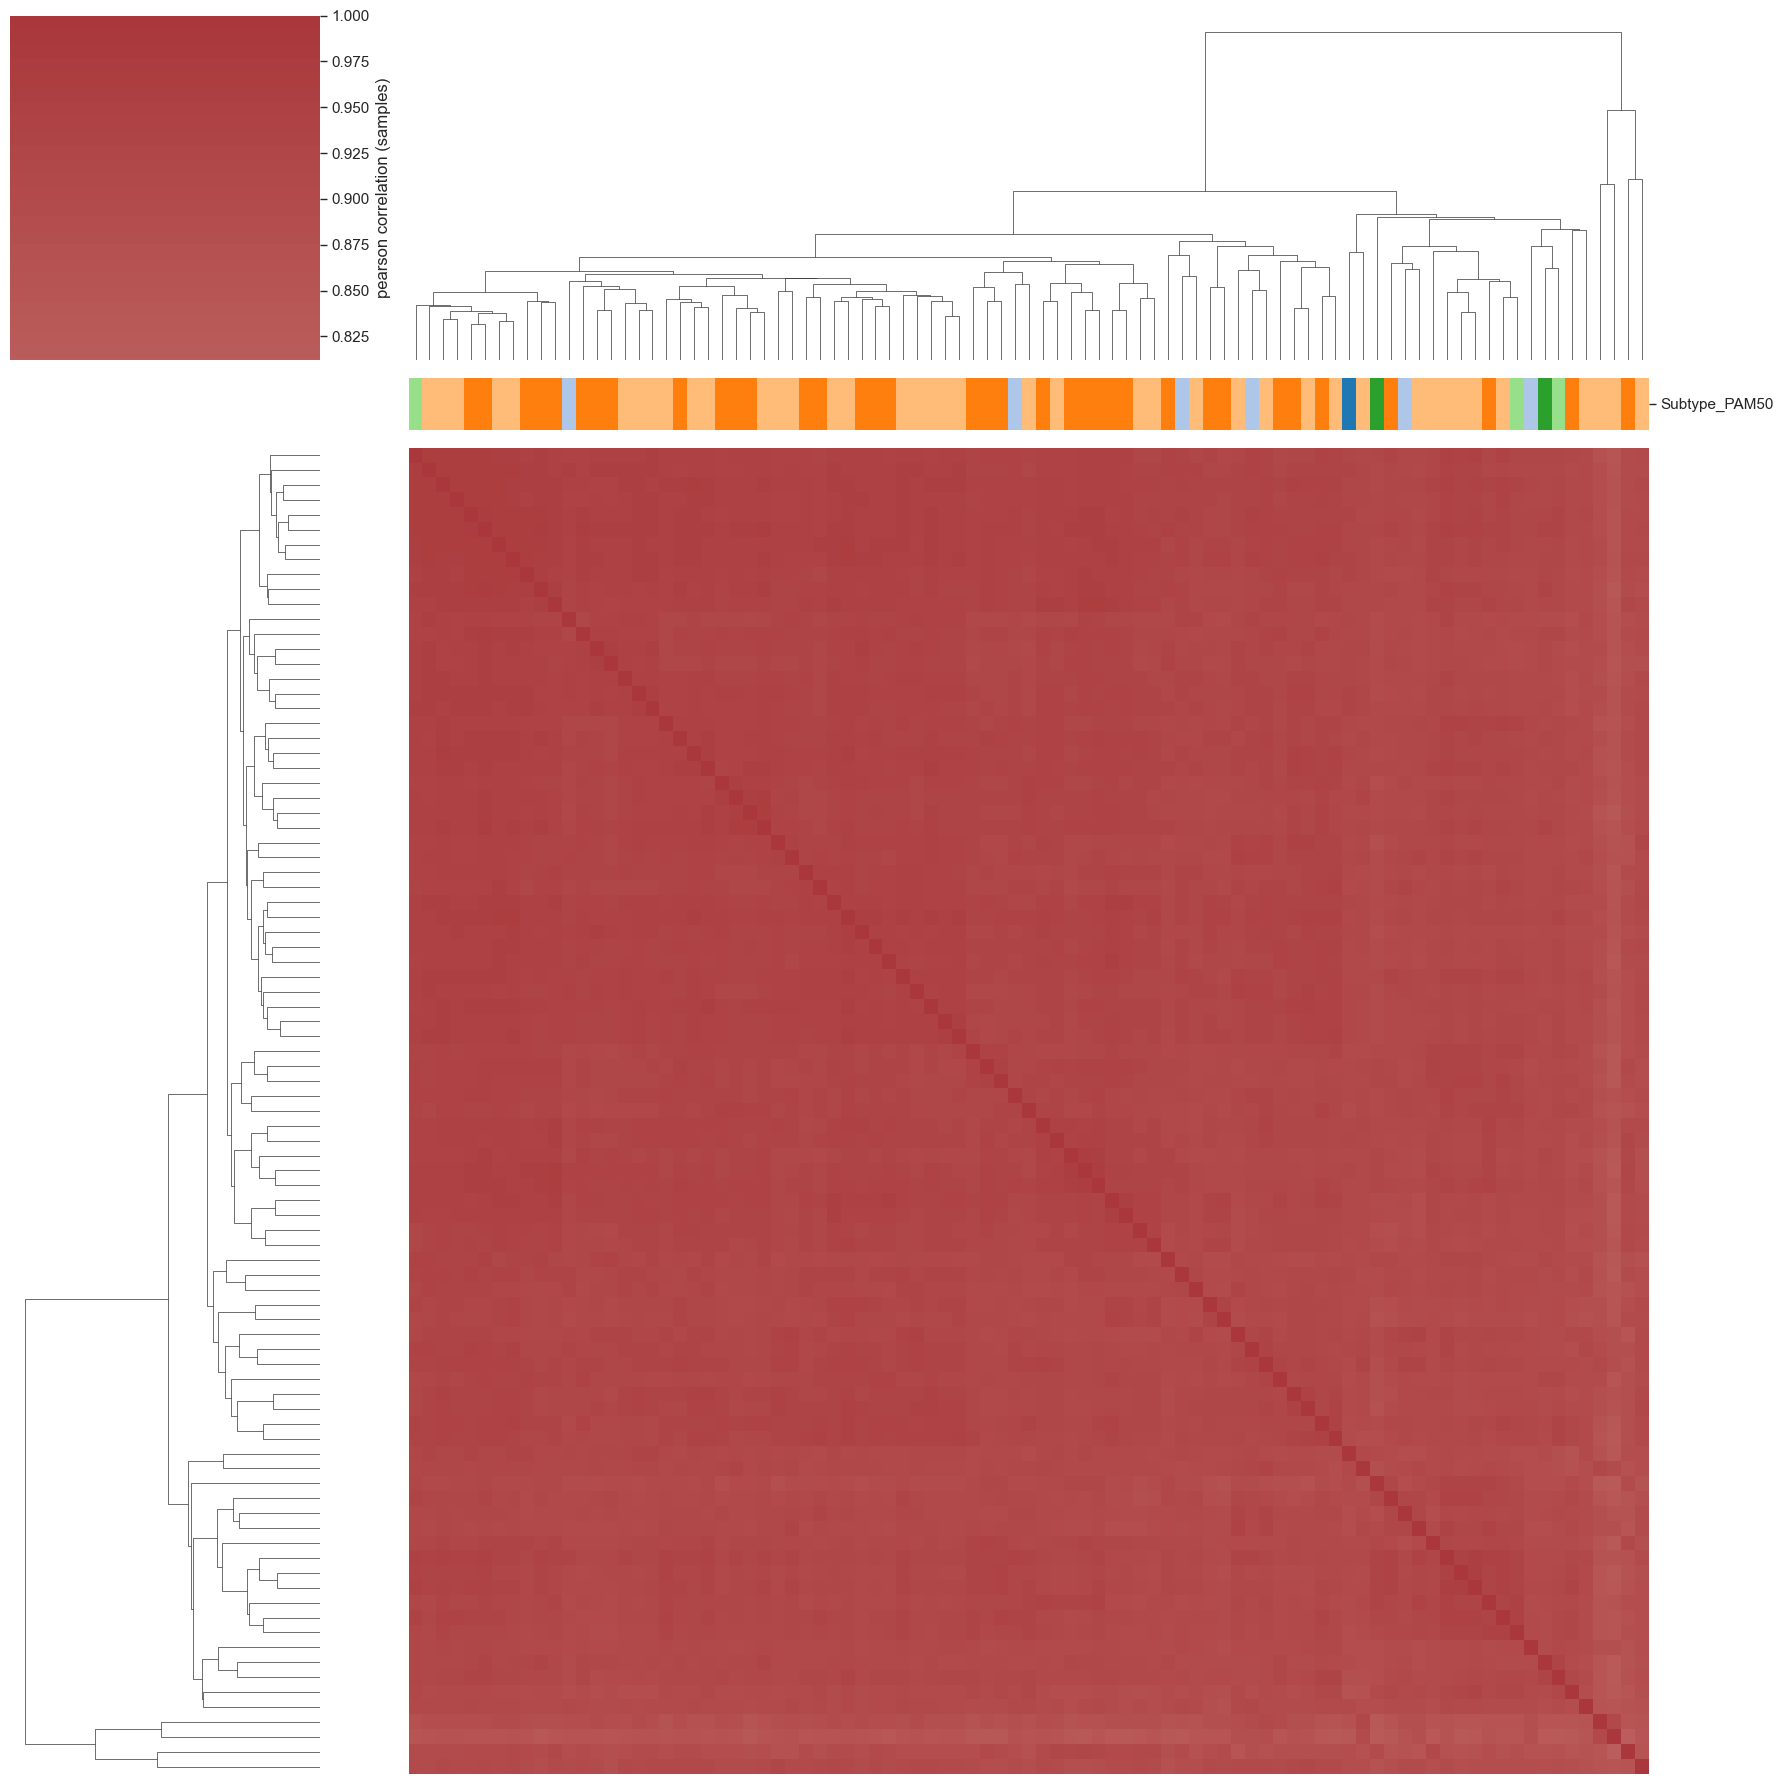

In [19]:
# 5) sample QC correlation heatmap
bk.pl.corr_heatmap(
    adata,
    layer="log1p_cpm",
    method="pearson",
    groupby="Subtype_PAM50",
    col_colors="Subtype_PAM50",   # nice annotation
    save="figs/corr_heatmap.png",
)

## 6.6. Gene Plot

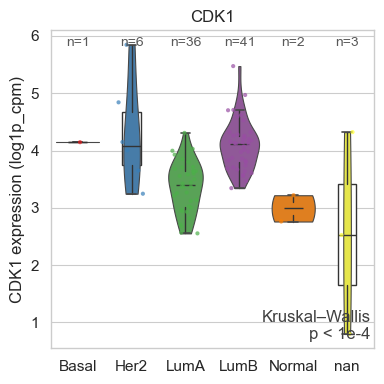

(<Figure size 400x400 with 1 Axes>,
 <Axes: title={'center': 'CDK1'}, ylabel='CDK1 expression (log1p_cpm)'>,
 {'test': 'Kruskal–Wallis', 'pvalue': 3.3816506907753345e-07, 'compare': None})

In [22]:
# Overall p-value across all PAM50 subtypes
bk.pl.gene_plot(
    adata,
    gene="CDK1",
    groupby="Subtype_PAM50",
    layer="log1p_cpm",
    test="auto",           # defaults to Kruskal
    kind="both",
    figsize=(4,4),
    save="figs/CDK1_by_PAM50.png",
)

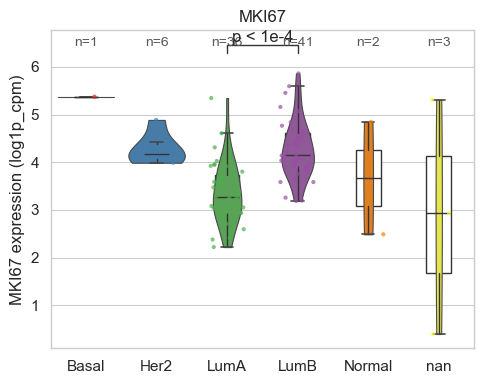

(<Figure size 500x400 with 1 Axes>,
 <Axes: title={'center': 'MKI67'}, ylabel='MKI67 expression (log1p_cpm)'>,
 {'test': 'Mann–Whitney U',
  'pvalue': 5.433595540609767e-08,
  'compare': ['LumA', 'LumB']})

In [24]:
# Pairwise LumA vs LumB with bracket
bk.pl.gene_plot(
    adata,
    gene="MKI67",
    groupby="Subtype_PAM50",
    layer="log1p_cpm",
    compare=["LumA", "LumB"],
    test="wilcoxon",       # Mann–Whitney U
    kind="both",
    figsize=(5,4),
    save="figs/MKI67_LumA_vs_LumB.png",
)

# X. Utilities

## rank_genes_groups

In [ ]:
# like Scanpy (group vs rest)

In [7]:
# Group versus specific reference
bk.tl.rank_genes_groups(
    adata,
    groupby="Subtype_PAM50",
    groups=["LumB", "Normal"],
    reference="LumA",
    layer="log1p_cpm",
    method="wilcoxon",
    n_genes=50,
)

INFO: rank_genes_groups: groupby='Subtype_PAM50', method='wilcoxon', layer='log1p_cpm', reference='LumA', n_genes=50
INFO: rank_genes_groups: stored results in adata.uns['rank_genes_groups']


In [8]:
#Everyone versus the rest
bk.tl.rank_genes_groups(
    adata,
    groupby="Subtype_PAM50",
    layer="log1p_cpm",
    method="t-test",
    n_genes=50,
)

INFO: rank_genes_groups: groupby='Subtype_PAM50', method='t-test', layer='log1p_cpm', reference='rest', n_genes=50
/Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/MM01_BULLKpy/bullkpy-skeleton/src/bullkpy/tl/rank_genes_groups.py:149: RuntimeWarning: Degrees of freedom <= 0 for slice
  vg = Xg.var(axis=0, ddof=1)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
INFO: rank_genes_groups: stored results in adata.uns['rank_genes_groups']


Get the genes from `adata.uns['rank_genes_groups']` into a dataframe

In [9]:
df_lumb = bk.get.rank_genes_groups_df(adata, group="LumB", sort_by="scores")
df_lumb.head()

,gene,scores,log2FC,pval,qval,mean_group,mean_ref
0,BIRC5,6.564916,1.405772,3.961000e-09,0.000113,3.390944,2.416538
1,TPX2,6.474869,1.112798,1.007184e-08,0.000113,4.056184,3.284851
2,AURKA,6.308528,1.174197,1.140237e-08,0.000113,3.648570,2.834679
3,NCAPG,6.276493,1.019112,1.774515e-08,0.000113,3.375680,2.669285
4,CENPI,6.232019,0.934668,1.720663e-08,0.000113,3.756181,3.108318


micro-helper: `bk.get.rank_genes_groups_df(..., group=None)` to concatenate all groups into one long table with a group column (super handy for exporting and for dotplots/heatmaps).

In [5]:
bk.tl.rank_genes_groups(adata, groupby="Subtype_PAM50", layer="log1p_cpm", method="t-test", n_genes=200)

df_all = bk.get.rank_genes_groups_df_all(adata)
df_all.head()

INFO: rank_genes_groups: groupby='Subtype_PAM50', method='t-test', layer='log1p_cpm', reference='rest', n_genes=200
/Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/MM01_BULLKpy/bullkpy-skeleton/src/bullkpy/tl/rank_genes_groups.py:149: RuntimeWarning: Degrees of freedom <= 0 for slice
  vg = Xg.var(axis=0, ddof=1)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
INFO: rank_genes_groups: stored results in adata.uns['rank_genes_groups']


,group,gene,scores,log2FC,pval,qval,mean_group,mean_ref
0,Basal,ZZZ3,NaN,0.225733,NaN,NaN,4.669474,4.513008
1,Basal,INO80E,NaN,0.725135,NaN,NaN,4.222354,3.719729
2,Basal,INHBB,NaN,-1.847164,NaN,NaN,2.226188,3.506544
3,Basal,INHBC,NaN,-0.141118,NaN,NaN,0.000000,0.097815
4,Basal,INHBE,NaN,0.154171,NaN,NaN,0.306988,0.200125


In [ ]:
# export
df_all.to_csv("results/rank_genes_groups_all.tsv", sep="\t", index=False)

In [25]:
#1. compute ranks
bk.tl.rank_genes_groups(adata, groupby="Subtype_PAM50", layer="log1p_cpm", method="t-test", n_genes=200)

INFO: rank_genes_groups: groupby='Subtype_PAM50', method='t-test', layer='log1p_cpm', reference='rest', n_genes=200
/Users/mmalumbres/Library/CloudStorage/OneDrive-VHIO/BioInformatics/BioProjects/MM01_BULLKpy/bullkpy-skeleton/src/bullkpy/tl/rank_genes_groups.py:149: RuntimeWarning: Degrees of freedom <= 0 for slice
  vg = Xg.var(axis=0, ddof=1)
/Users/mmalumbres/mambaforge/envs/biopython/lib/python3.10/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
INFO: rank_genes_groups: stored results in adata.uns['rank_genes_groups']


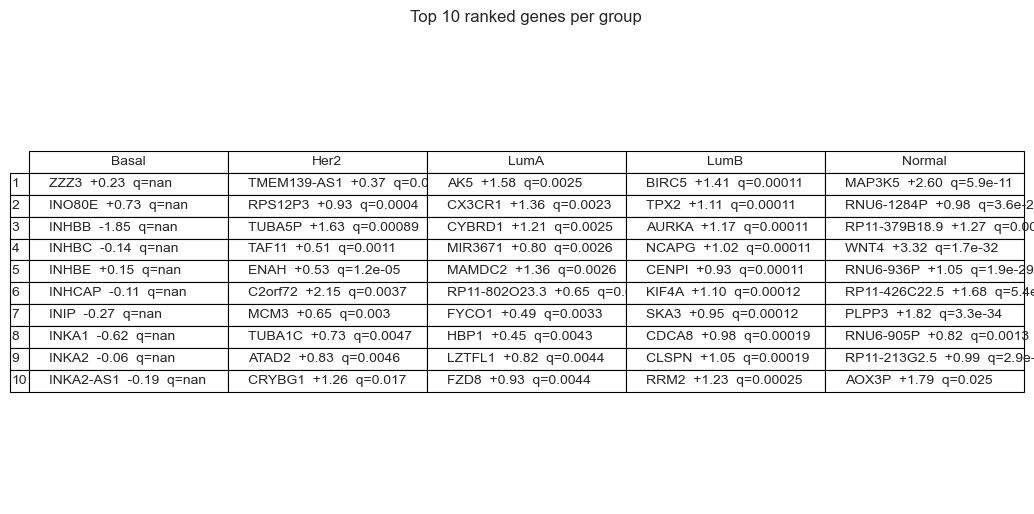

(<Figure size 1050x530 with 1 Axes>,
 <Axes: title={'center': 'Top 10 ranked genes per group'}>)

In [26]:
#2. Quick table view
bk.pl.rank_genes_groups(adata, n_genes=10, save="figs/rank_genes_groups_table.png")

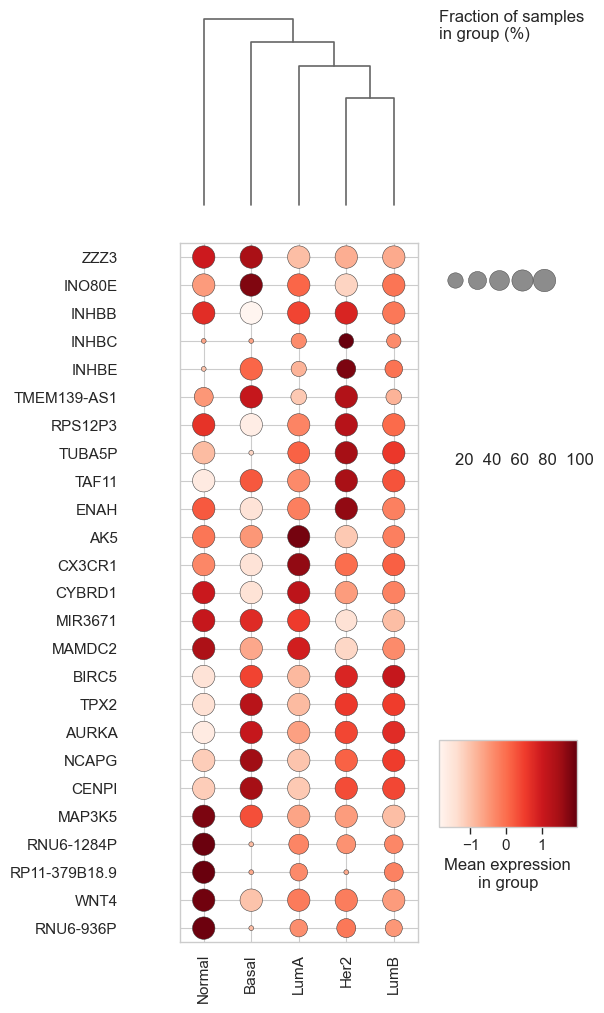

(<Figure size 615x1575 with 4 Axes>, <Axes: >)

In [27]:
#3. Dotplot of top markers per group (Scanpy-ish)

bk.pl.rank_genes_groups_dotplot(
    adata,
    groupby="Subtype_PAM50",
    n_genes=5,
    swap_axes=True,
    dendrogram_top=True,
    save="figs/rank_genes_groups_dotplot.png",
)

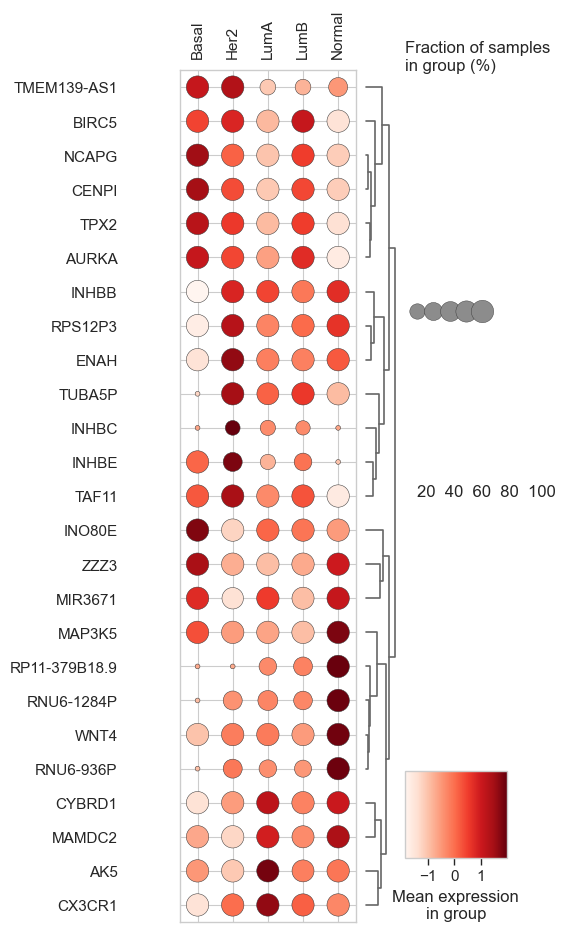

(<Figure size 615x1575 with 4 Axes>, <Axes: >)

In [28]:
bk.pl.rank_genes_groups_dotplot(
    adata,
    groupby="Subtype_PAM50",
    n_genes=5,
    swap_axes=True,
    dendrogram_top=False,
    dendrogram_rows=True,
    
    save="figs/rank_genes_groups_dotplot.png",
)

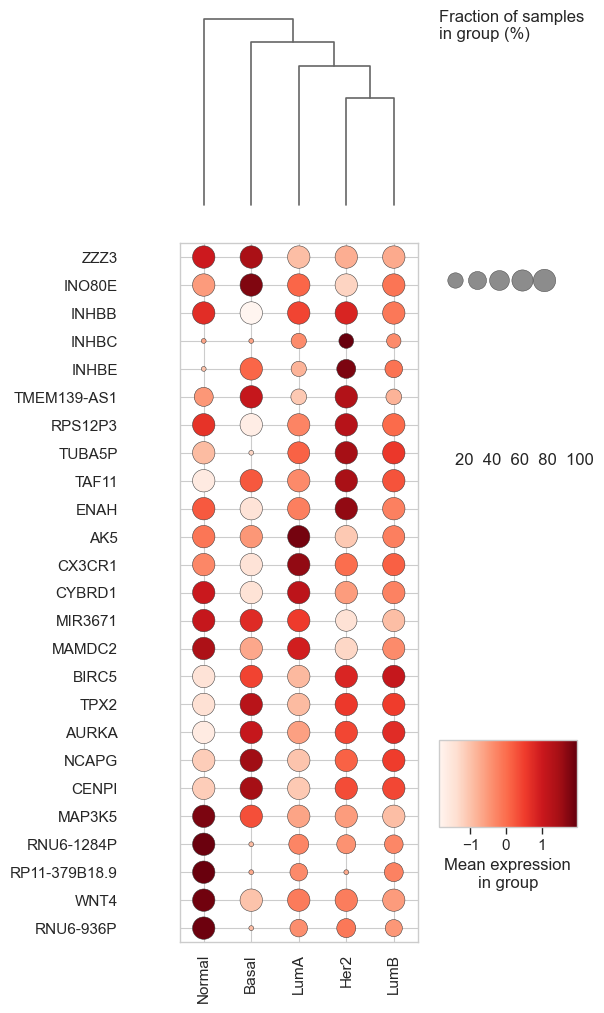

(<Figure size 615x1575 with 4 Axes>, <Axes: >)

In [30]:
#A. Scanpy-like expression dotplot (auto standard_scale=“var”)
bk.pl.rank_genes_groups_dotplot(
    adata,
    groupby="Subtype_PAM50",
    n_genes=5,
    values_to_plot="expression",
    standard_scale="auto",
    save="figs/rgg_dotplot_expression.png",
)

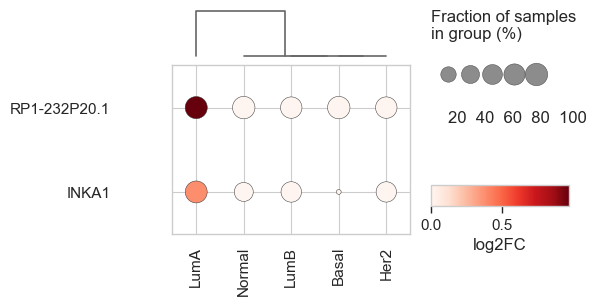

(<Figure size 615x380 with 4 Axes>, <Axes: >)

In [31]:
#B. B) Color by log2FC (still sizes by fraction from counts)
bk.pl.rank_genes_groups_dotplot(
    adata,
    groupby="Subtype_PAM50",
    n_genes=5,
    values_to_plot="logfoldchanges",
    min_in_group_fraction=0.2,
    max_in_group_fraction=0.95,
    save="figs/rgg_dotplot_logFC.png",
)

## Batch Correction

Best practice is to run ComBat on log-normalized expression (not raw counts):

In [7]:
adata.obs.Batch.value_counts()

Batch4    29
Batch2    17
Batch3    17
Batch1    13
Batch5    10
Name: Batch, dtype: int64

In [8]:
bk.pp.batch_correct_combat(
    adata,
    batch_key="Batch",
    layer="log1p_cpm",
    covariates=["Subtype_PAM50"],   # preserve biology
    key_added="combat_log1p_cpm",
)

INFO: ComBat: correcting layer='log1p_cpm' with batch_key='Batch' (5 batches), covariates=['Subtype_PAM50']
INFO: ComBat: stored corrected matrix in adata.layers['combat_log1p_cpm']


In [10]:
adata.layers

Layers with keys: counts, cpm, log1p_cpm, combat_log1p_cpm

In [ ]:
#then use downstream
bk.tl.pca(adata, layer="combat_log1p_cpm", use_highly_variable=True)
bk.tl.neighbors(adata, use_rep="X_pca", n_neighbors=15)
bk.tl.umap(adata)

## PCA loadings

In [6]:
bk.tl.pca_loadings(adata, pcs=[1,2,3], n_top=10)

{'PC1_pos':         pc sign  rank    gene   loading
 11397  PC1  pos     1    KRT1  0.133765
 8278   PC1  pos     2     FLG  0.131295
 11456  PC1  pos     3    KRT5  0.125605
 6794   PC1  pos     4    DSG1  0.122890
 26132  PC1  pos     5    SBSN  0.120129
 27804  PC1  pos     6  SPRR2E  0.119721
 11495  PC1  pos     7  KRTDAP  0.116419
 11401  PC1  pos     8   KRT14  0.114822
 27806  PC1  pos     9  SPRR2G  0.109814
 6784   PC1  pos    10    DSC3  0.109744,
 'PC1_neg':         pc sign  rank        gene   loading
 18508  PC1  neg     1       RIMS4 -0.054486
 26450  PC1  neg     2    SERPINA5 -0.045019
 12258  PC1  neg     3   LINC01488 -0.035528
 2077   PC1  neg     4       ASCL1 -0.034721
 8806   PC1  neg     5       GFRA1 -0.033653
 10408  PC1  neg     6       IGHG4 -0.033631
 1300   PC1  neg     7         ALB -0.032197
 560    PC1  neg     8  AC061961.2 -0.031775
 15241  PC1  neg     9      NKAIN1 -0.031698
 4622   PC1  neg    10      COL2A1 -0.031609,
 'PC2_pos':         pc sign  r

In [7]:
#Export
bk.tl.pca_loadings(
    adata,
    pcs=[1,2,3,4,5],
    n_top=10,
    export="results/pca_loadings.tsv",
    export_gmt="results/pca_loadings.gmt",
)

INFO: pca_loadings: exported results/pca_loadings.tsv and results/pca_loadings.wide.tsv
INFO: pca_loadings: exported GMT to results/pca_loadings.gmt


{'PC1_pos':         pc sign  rank    gene   loading
 11397  PC1  pos     1    KRT1  0.133765
 8278   PC1  pos     2     FLG  0.131295
 11456  PC1  pos     3    KRT5  0.125605
 6794   PC1  pos     4    DSG1  0.122890
 26132  PC1  pos     5    SBSN  0.120129
 27804  PC1  pos     6  SPRR2E  0.119721
 11495  PC1  pos     7  KRTDAP  0.116419
 11401  PC1  pos     8   KRT14  0.114822
 27806  PC1  pos     9  SPRR2G  0.109814
 6784   PC1  pos    10    DSC3  0.109744,
 'PC1_neg':         pc sign  rank        gene   loading
 18508  PC1  neg     1       RIMS4 -0.054486
 26450  PC1  neg     2    SERPINA5 -0.045019
 12258  PC1  neg     3   LINC01488 -0.035528
 2077   PC1  neg     4       ASCL1 -0.034721
 8806   PC1  neg     5       GFRA1 -0.033653
 10408  PC1  neg     6       IGHG4 -0.033631
 1300   PC1  neg     7         ALB -0.032197
 560    PC1  neg     8  AC061961.2 -0.031775
 15241  PC1  neg     9      NKAIN1 -0.031698
 4622   PC1  neg    10      COL2A1 -0.031609,
 'PC2_pos':         pc sign  r

In [8]:
#Absolute loadings only (single list per PC)
bk.tl.pca_loadings(adata, pcs=[1,2,3], n_top=100, use_abs=True)

{'PC1_abs':         pc sign  rank   gene   loading
 11397  PC1  abs     1   KRT1  0.133765
 8278   PC1  abs     2    FLG  0.131295
 11456  PC1  abs     3   KRT5  0.125605
 6794   PC1  abs     4   DSG1  0.122890
 26132  PC1  abs     5   SBSN  0.120129
 ...    ...  ...   ...    ...       ...
 8010   PC1  abs    96   FAT2  0.052890
 8875   PC1  abs    97   GJB6  0.052694
 11327  PC1  abs    98  KLK13  0.052665
 8871   PC1  abs    99   GJB2  0.052084
 30751  PC1  abs   100     XG  0.051482
 
 [100 rows x 5 columns],
 'PC2_abs':         pc sign  rank        gene   loading
 4771   PC2  abs     1        CPB1 -0.114210
 8177   PC2  abs     2         FGB  0.084490
 14107  PC2  abs     3       MMP13 -0.080426
 8176   PC2  abs     4         FGA  0.079311
 14340  PC2  abs     5   MRPS30-DT -0.077875
 ...    ...  ...   ...         ...       ...
 650    PC2  abs    96  AC092071.1 -0.048750
 29588  PC2  abs    97         TRH -0.048503
 1437   PC2  abs    98     ANGPTL3  0.048207
 4161   PC2  abs    9

### PCA loadings

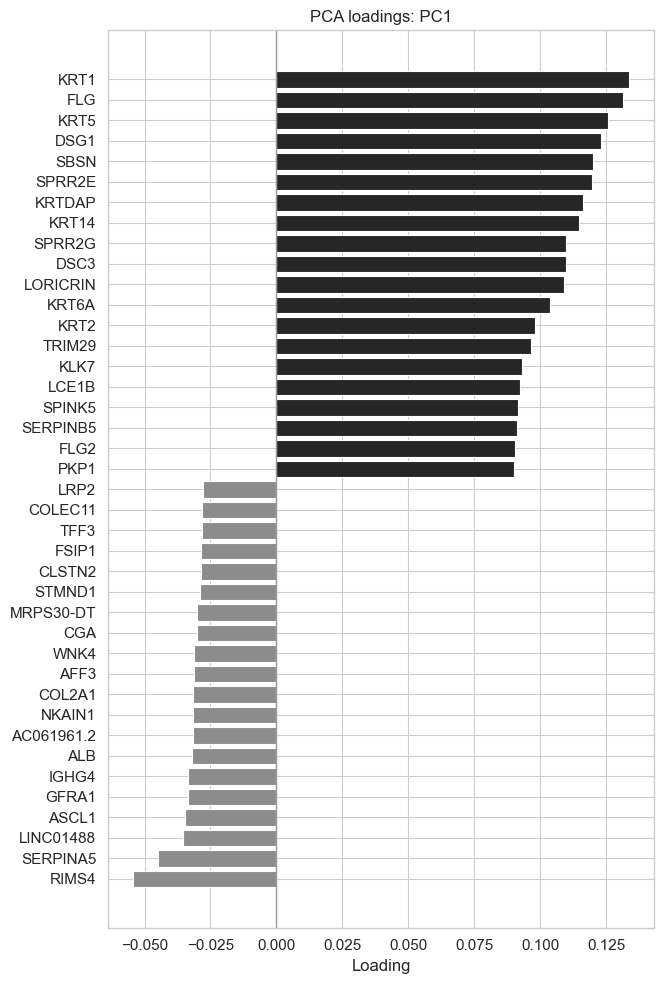

(<Figure size 680x1000 with 1 Axes>,
 <Axes: title={'center': 'PCA loadings: PC1'}, xlabel='Loading'>)

In [32]:
# Barplot for PC1 (top pos/neg)
bk.pl.pca_loadings_bar(adata, pc=1, n_top=20, save="figs/pc1_loadings_bar.png")

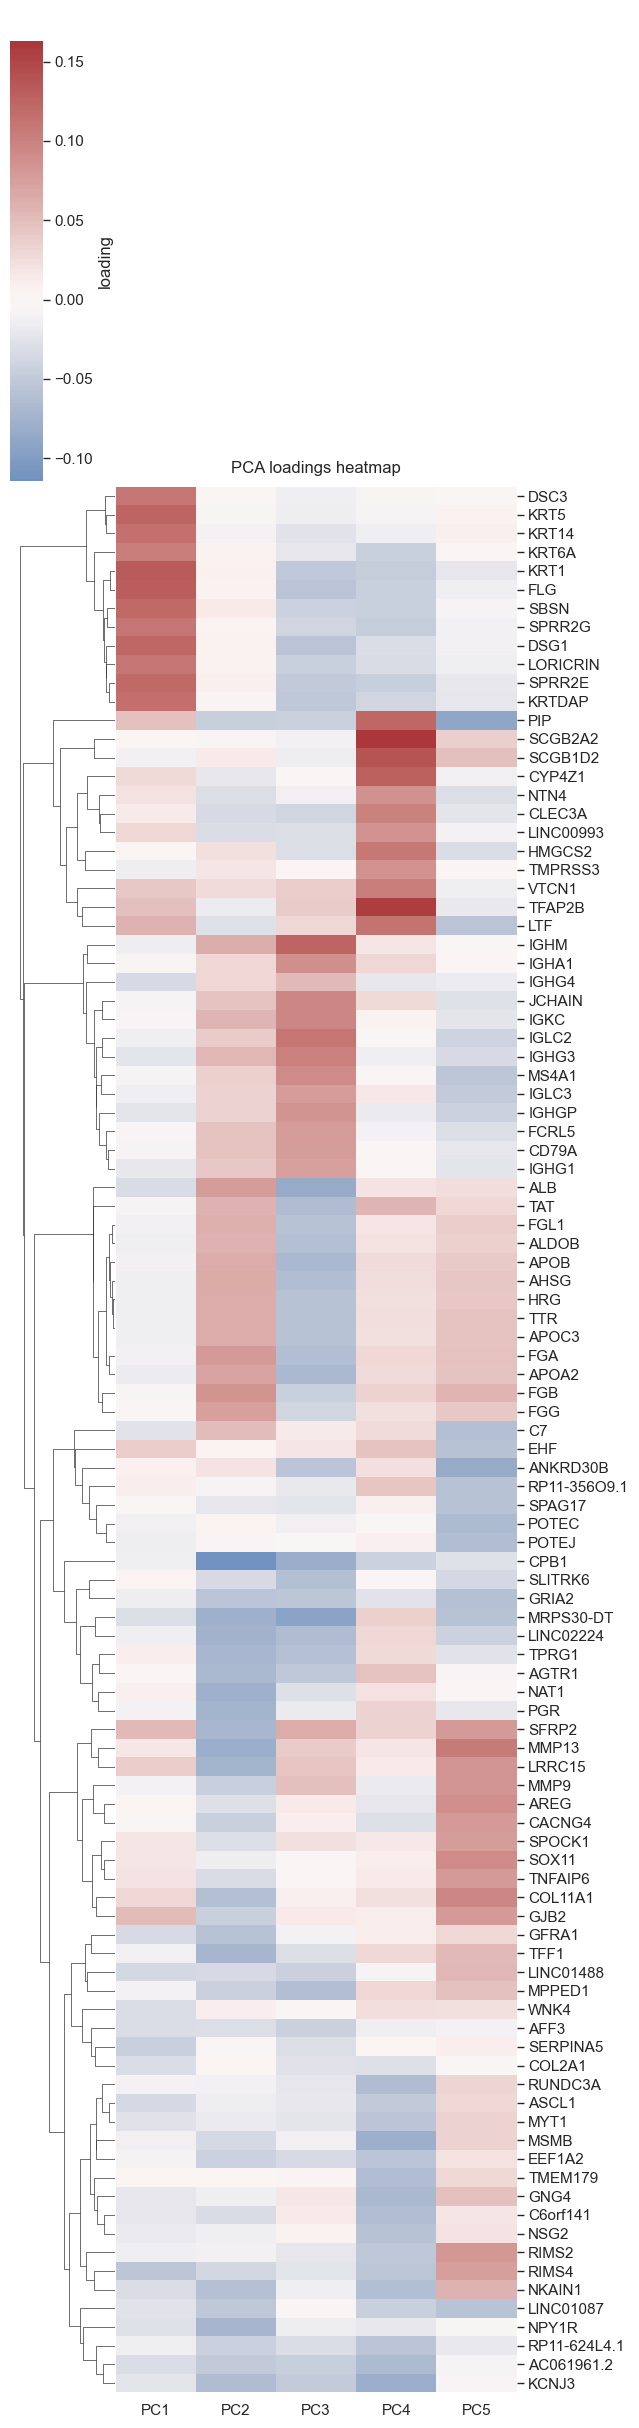

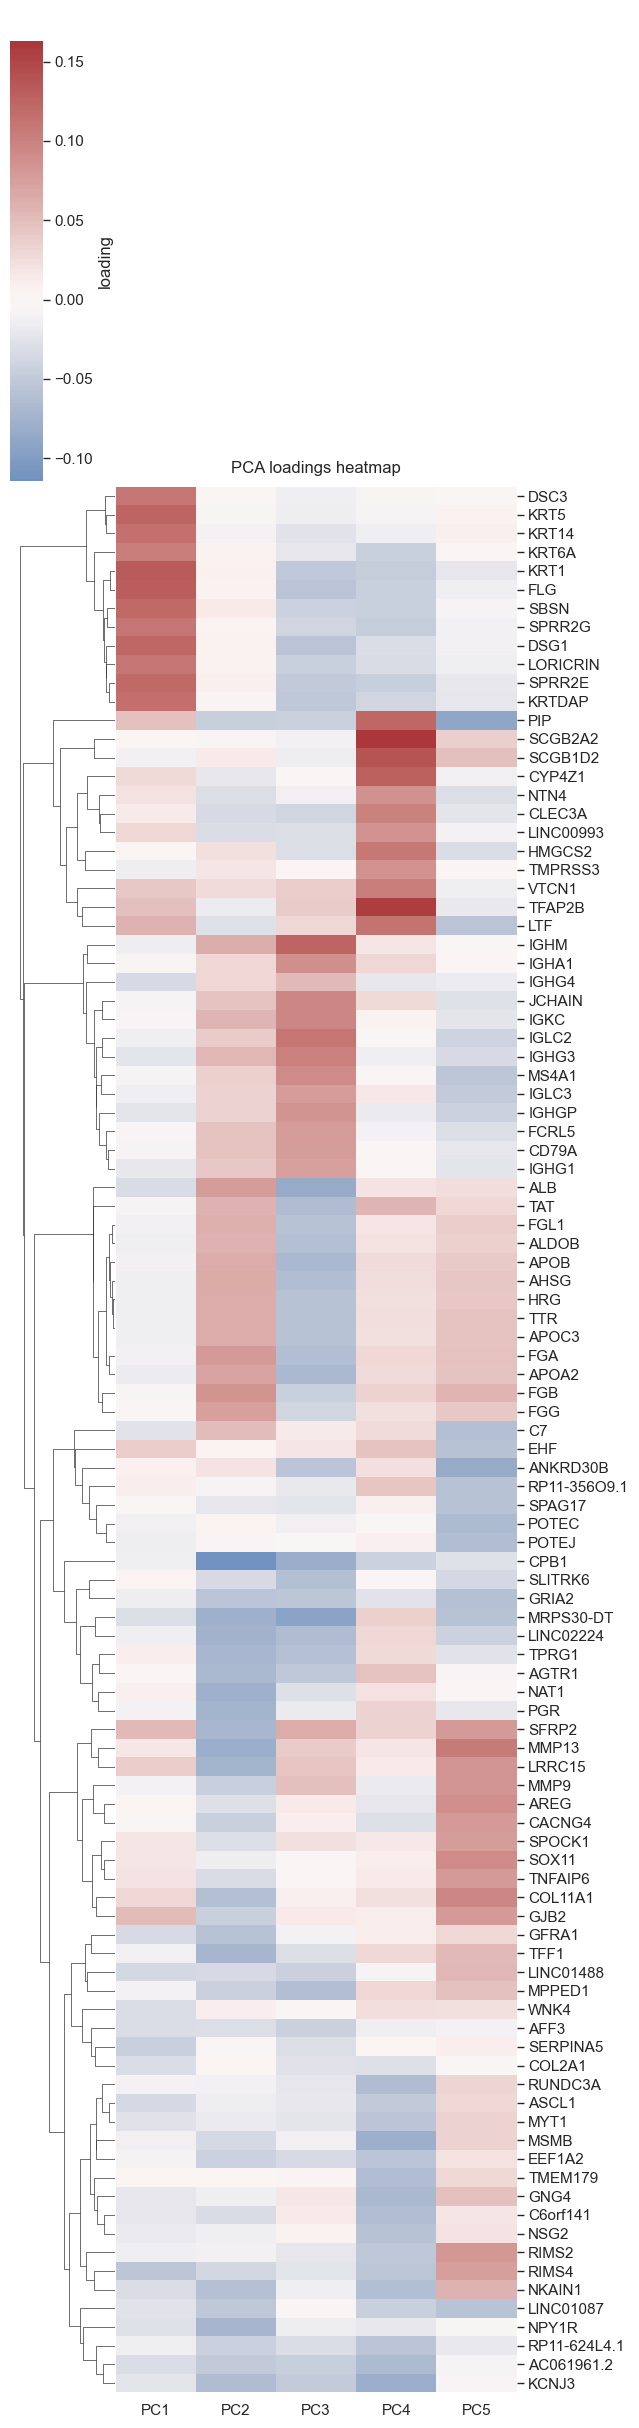

In [33]:
# Heatmap for PC1–PC5 (union of top genes)
bk.pl.pca_loadings_heatmap(
    adata,
    pcs=[1,2,3,4,5],
    n_top=12,
    cluster_genes=True,
    cluster_pcs=False,
    z_score=False,
    save="figs/pca_loadings_heatmap.png",
)

# Save h5ad object

In [ ]:
#adata.uns.setdefault("bullkpy", {})
#adata.uns["bullkpy"]["loaded_with_version"] = bk.__version__
#adata.uns["bullkpy"]["load_date"] = datetime.now().isoformat()

In [34]:
adata.uns["bullkpy"] = {
    "version": bk.__version__,
    "date": __import__("datetime").datetime.now().isoformat(),
}

In [35]:
adata.write("251222_CDKpredict_BULLKpy_RNAseq.h5ad",
            #compression="gzip",
           )

### If Errors in saving

In [43]:
bad = []
for col in adata.obs.columns:
    s = adata.obs[col]
    if pd.api.types.is_categorical_dtype(s):
        cats = list(s.cat.categories)
        # flag anything that is not a plain string
        if any((c is not None) and (not isinstance(c, str)) for c in cats):
            bad.append(col)

bad

['Subtype']

In [44]:
for col in bad:
    s = adata.obs[col]
    # keep as category but ensure categories are strings
    adata.obs[col] = s.astype("category")
    adata.obs[col] = adata.obs[col].cat.rename_categories(
        [str(c) for c in adata.obs[col].cat.categories]
    )

In [51]:
def _make_serializable(x):
    # numpy scalars
    if isinstance(x, (np.generic,)):
        return x.item()
    # pandas objects
    if isinstance(x, (pd.Index,)):
        return x.astype(str).tolist()
    if isinstance(x, (pd.Series,)):
        return x.to_list()
    if isinstance(x, (pd.DataFrame,)):
        return x.to_dict(orient="list")
    # sets/tuples
    if isinstance(x, (set, tuple)):
        return list(x)
    # dicts/lists recurse
    if isinstance(x, dict):
        return {str(k): _make_serializable(v) for k, v in x.items()}
    if isinstance(x, list):
        return [_make_serializable(v) for v in x]
    # numpy arrays OK
    if isinstance(x, np.ndarray):
        return x
    # basic python types OK
    if isinstance(x, (str, int, float, bool)) or x is None:
        return x
    # fallback: stringify
    return str(x)

adata.uns = _make_serializable(adata.uns)